In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, rcParams
import altair as alt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error, make_scorer, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from data_type_fix import data_type_fix
#import shap

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [3]:
our_settings = {'xtick.color' : 'white',
                     'ytick.color' : 'white',
                     'axes.labelcolor' : 'white',
                     'text.color' : 'white',
                     'axes.labelsize' : 15,
                     'axes.grid' : True,
                     'grid.color' : 'grey',
                     'grid.linestyle' : '-.',
                     'grid.alpha' : 0.3,
                     'xtick.labelsize' : 11,
                     'xtick.major.width' : 3,
                     'xtick.minor.width' : 3,
                     'ytick.labelsize' : 11,
                     'ytick.major.width' : 3,
                     'ytick.minor.width' : 3,
                     'legend.fontsize' : 11,
                     'legend.loc' : 'best',
                     'figure.figsize' : (6,6)}

plt.style.use('dark_background')
plt.rcParams.update(our_settings)

In [4]:
import shap

In [5]:
df = pd.read_csv('steam_games_dataset.csv')
df = data_type_fix(df)

In [6]:
df['windows'].value_counts()

windows
True    4703
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4703 entries, 0 to 4702
Data columns (total 84 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   appid                                     4703 non-null   int64         
 1   normalized_name                           4703 non-null   object        
 2   name                                      4703 non-null   object        
 3   release_date                              4703 non-null   datetime64[ns]
 4   24h_peak_ccu                              4703 non-null   float64       
 5   all_time_peak_ccu                         3179 non-null   float64       
 6   required_age                              4703 non-null   int64         
 7   dlc_count                                 4703 non-null   int64         
 8   about_the_game                            4690 non-null   object        
 9   summary                       

In [8]:
df_prediction = df.copy(deep=True)

# Data preparation for prediction

In [9]:
mlb = MultiLabelBinarizer()

In [10]:
tag_groups = {'Themes & Moods': ['Atmospheric',
  'Fantasy',
  'Relaxing',
  'Funny',
  'Horror',
  'Sci-fi',
  'Family Friendly',
  'Retro',
  'Mystery',
  'Dark',
  'Survival',
  'Comedy',
  'Psychological Horror',
  'Medieval',
  'Sports',
  'Old School',
  'Magic',
  'Management',
  'Building',
  'Tactical',
  'Racing',
  'Space',
  'Drama',
  'Futuristic',
  'Romance',
  'Logic',
  'Crafting',
  'Dark Fantasy',
  'Emotional',
  'Survival Horror',
  'Nature',
  'Education',
  "1990's",
  '1980s',
  'Surreal',
  'Post-apocalyptic',
  'War',
  'Zombies',
  'Historical',
  'Stealth',
  'Investigation',
  'Lore-Rich',
  'LGBTQ+',
  'Military',
  'Economy',
  'Thriller',
  'Psychological',
  'Cyberpunk',
  'Detective',
  'Dark Humor',
  'Demons',
  'Aliens',
  'Robots',
  'Supernatural',
  'Driving',
  'Comic Book',
  'Modern',
  'Dystopian',
  'Psychedelic',
  'Loot',
  'Artificial Intelligence',
  'Flight',
  'Cats',
  'Alternate History',
  'Memes',
  'Parkour',
  'Mythology',
  'Crime',
  'Game Development',
  'Destruction',
  'Capitalism',
  'Automation',
  'Philosophical',
  'Dark Comedy',
  'Cooking',
  'Lovecraftian',
  'Noir',
  'Swordplay',
  'Science',
  'America',
  'Dragons',
  'Parody',
  'Agriculture',
  'World War II',
  'Conspiracy',
  'Martial Arts',
  'Gothic',
  'Mechs',
  'Satire',
  'Underground',
  'Dog',
  'Fishing',
  'Pirates',
  'Mining',
  'Steampunk',
  'Time Travel',
  'Transportation',
  'Vampire',
  'Political',
  'Underwater',
  'Tanks',
  'Ninja',
  'Hunting',
  'Otome',
  'Trains',
  'Gambling',
  'Western',
  'Hacking',
  'Dinosaurs',
  'Faith',
  'Programming',
  'Superhero',
  'Politics',
  'Assassin',
  'Diplomacy',
  'Naval',
  'Snow',
  'Heist',
  'Archery',
  'Cold War',
  'Sailing',
  'Horses',
  'Football (Soccer)',
  'Foreign',
  'Offroad',
  'Transhumanism',
  'Sniper',
  'Illuminati',
  'Boxing',
  'Jet',
  'Werewolves',
  'Mars',
  'Motorbike',
  'Golf',
  'World War I',
  'Basketball',
  'Baseball',
  'Bikes',
  'Rome',
  'Submarine',
  'LEGO',
  'Skateboarding',
  'Mini Golf',
  'Wrestling',
  'Football (American)',
  'Pool',
  'Tennis',
  'Skating',
  'Cycling',
  'Motocross',
  'Warhammer 40K',
  'Hockey',
  'Bowling',
  'Lemmings',
  'Skiing',
  'Snowboarding',
  'BMX',
  'ATV'],
 'Top-Level Genres': ['Indie',
  'Action',
  'Casual',
  'Adventure',
  'Simulation',
  'RPG',
  'Strategy',
  'Action-Adventure',
  'Sports',
  'Racing',
  'Software'],
 'Visuals & Viewpoint': ['2D',
  '3D',
  'Colorful',
  'Pixel Graphics',
  'Cute',
  'First-Person',
  'Anime',
  'Stylized',
  'Third Person',
  'Top-Down',
  'Realistic',
  'Cartoony',
  'Hand-drawn',
  'Minimalist',
  'VR',
  'Cartoon',
  'Cinematic',
  'Text-Based',
  '2.5D',
  'Isometric',
  'Abstract',
  'Comic Book',
  'Psychedelic',
  'Noir',
  '3D Vision',
  'Split Screen',
  'Voxel',
  'FMV',
  'Beautiful',
  '360 Video'],
 'Features': ['Story Rich',
  'Combat',
  'Controller',
  'Female Protagonist',
  'Choices Matter',
  'PvE',
  'PvP',
  'Linear',
  'Open World',
  'Multiple Endings',
  'Physics',
  'Character Customization',
  'Crafting',
  'Procedural Generation',
  'Turn-Based Combat',
  'Turn-Based Tactics',
  'Resource Management',
  'Tabletop',
  'Hack and Slash',
  'Base-Building',
  'Score Attack',
  'Text-Based',
  'Stealth',
  'Narration',
  'Conversation',
  'Deckbuilding',
  'Nonlinear',
  'Tutorial',
  'Team-Based',
  'Perma Death',
  'Inventory Management',
  'Artificial Intelligence',
  'Level Editor',
  'Grid-Based Movement',
  'Automation',
  'Moddable',
  'Class-Based',
  'Vehicular Combat',
  'Gun Customization',
  'Trading',
  '6DOF',
  'Bullet Time',
  'Time Manipulation',
  'Quick-Time Events',
  'FMV',
  'Dynamic Narration',
  'Hex Grid',
  'Naval Combat',
  'Music-Based Procedural Generation',
  'Asymmetric VR'],
 'Genres': ['Puzzle',
  'Action-Adventure',
  'Arcade',
  'Shooter',
  'Platformer',
  'Visual Novel',
  'Rogue-like',
  'Sandbox',
  'Action RPG',
  'Point & Click',
  'Action Roguelike',
  'Interactive Fiction',
  'Turn-Based Strategy',
  'Tabletop',
  'Dating Sim',
  'Education',
  'Walking Simulator',
  'JRPG',
  'Party-Based RPG',
  'Card Game',
  'Life Sim',
  'Design & Illustration',
  'Strategy RPG',
  'RTS',
  'Board Game',
  'Tower Defense',
  'City Builder',
  'Web Publishing',
  "Beat 'em up",
  'Automobile Sim',
  '2D Fighter',
  'Rhythm',
  'Farming Sim',
  '3D Fighter',
  'e-sports',
  'Word Game',
  'Colony Sim',
  'Grand Strategy',
  'Auto Battler',
  'Space Sim',
  'Animation & Modeling',
  'Battle Royale',
  'MMORPG',
  'Audio Production',
  'God Game',
  '4X',
  'MOBA',
  'Trivia',
  'Photo Editing'],
 'Simulation': ['Simulation',
  'Survival',
  'Physics',
  'Medieval',
  'Sports',
  'Management',
  'Immersive Sim',
  'Building',
  'Racing',
  'Space',
  'Romance',
  'Crafting',
  'Nature',
  'Dating Sim',
  'Walking Simulator',
  'Base-Building',
  'Life Sim',
  'War',
  'Stealth',
  'Investigation',
  'Military',
  'Economy',
  'Detective',
  'Robots',
  'Driving',
  'City Builder',
  'Artificial Intelligence',
  'Flight',
  'Parkour',
  'Automobile Sim',
  'Crime',
  'Game Development',
  'Capitalism',
  'Automation',
  'Farming Sim',
  'Swordplay',
  'Colony Sim',
  'Space Sim',
  'Science',
  'Trading',
  'Agriculture',
  'World War II',
  'Martial Arts',
  'Mechs',
  'Underground',
  'Fishing',
  'Pirates',
  'Mining',
  'Transportation',
  'Political',
  'Underwater',
  'Tanks',
  'Ninja',
  'Hunting',
  'Trains',
  'Political Sim',
  'Hacking',
  'Dinosaurs',
  'Programming',
  'Politics',
  'Diplomacy',
  'Naval',
  'Heist',
  'Archery',
  'Cold War',
  'Sailing',
  'Football (Soccer)',
  'Sniper',
  'Boxing',
  'Jet',
  'Mars',
  'Outbreak Sim',
  'Motorbike',
  'Golf',
  'Medical Sim',
  'World War I',
  'Basketball',
  'Baseball',
  'Bikes',
  'Submarine',
  'Skateboarding',
  'Mini Golf',
  'Wrestling',
  'Football (American)',
  'Pool',
  'Tennis',
  'Skating',
  'Cycling',
  'Motocross',
  'Hockey',
  'Bowling',
  'Skiing',
  'Snowboarding',
  'BMX',
  'ATV'],
 'Video Genres': ['Action',
  'Fantasy',
  'Action-Adventure',
  'Anime',
  'Horror',
  'Sci-fi',
  'Comedy',
  'VR',
  'Drama',
  'Design & Illustration',
  'Tutorial',
  'Short',
  'Game Development',
  'Animation & Modeling',
  'Movie',
  'Episodic',
  'Foreign',
  '360 Video',
  'Gaming',
  'Documentary'],
 'Sub-Genres': ['Exploration',
  '2D Platformer',
  'FPS',
  'Rogue-lite',
  'Immersive Sim',
  '3D Platformer',
  'Action Roguelike',
  'Choose Your Own Adventure',
  "Shoot 'Em Up",
  'Side Scroller',
  'Puzzle-Platformer',
  'Turn-Based Tactics',
  'Hidden Object',
  'Hack and Slash',
  'Bullet Hell',
  'Dungeon Crawler',
  'Clicker',
  'Top-Down Shooter',
  'Third-Person Shooter',
  'Time Management',
  'Precision Platformer',
  'Collectathon',
  'Real Time Tactics',
  'Idler',
  'Arena Shooter',
  'Tactical RPG',
  'Wargame',
  'Card Battler',
  'Metroidvania',
  'Souls-like',
  'Runner',
  'Flight',
  'Creature Collector',
  'CRPG',
  'Twin Stick Shooter',
  'Mystery Dungeon',
  'Match 3',
  'Hero Shooter',
  'Looter Shooter',
  'Spectacle fighter',
  'Solitaire',
  'Combat Racing',
  'Action RTS',
  'Sokoban',
  'Trading Card Game',
  'Political Sim',
  'Typing',
  'On-Rails Shooter',
  'Traditional Roguelike',
  'Spelling',
  'Roguevania',
  'Outbreak Sim',
  'Medical Sim'],
 'Uncategorized': ['Hentai',
  'Cozy',
  'Fighting',
  'Classic',
  'Wholesome',
  'Roguelike Deckbuilder',
  'Open World Survival Craft',
  'Narrative',
  'Immersive',
  'Party Game',
  'Party',
  'Escape Room',
  'Addictive',
  'Nostalgia',
  'Farming',
  'Cult Classic',
  'Social Deduction',
  'Spaceships',
  'Pinball',
  'Electronic Music',
  'Ambient',
  'Jump Scare',
  'Boss Rush',
  'Instrumental Music',
  'Epic',
  'Rock Music',
  'Vikings',
  'Well-Written',
  'Electronic',
  'Musou',
  'Cricket',
  'Rugby',
  'Reboot'],
 'Players': ['Singleplayer',
  'Multiplayer',
  'PvP',
  'Co-op',
  'Online Co-Op',
  'Massively Multiplayer',
  'Local Multiplayer',
  'Local Co-Op',
  'Team-Based',
  '4 Player Local',
  'Co-op Campaign',
  'Asynchronous Multiplayer'],
 'Story': ['Story Rich',
  'Choices Matter',
  'Visual Novel',
  'Multiple Endings',
  'Choose Your Own Adventure',
  'Interactive Fiction',
  'Romance',
  'Historical',
  'Narration',
  'Lore-Rich',
  'Conversation',
  'Detective',
  'Alternate History',
  'Dynamic Narration',
  'Otome',
  'Based On A Novel'],
 'Actions & Activities': ['Exploration',
  'Shooter',
  'Survival',
  'Sports',
  'Building',
  'Stealth',
  'Investigation',
  'Flight',
  'Trading',
  'Agriculture',
  'Mining',
  'Hacking',
  'Programming'],
 'Scary': ['Horror',
  'Dark',
  'Psychological Horror',
  'Dark Fantasy',
  'Survival Horror',
  'Zombies',
  'Thriller',
  'Dark Humor',
  'Demons',
  'Crime',
  'Dark Comedy',
  'Lovecraftian',
  'Gothic',
  'Vampire',
  'Assassin',
  'Werewolves'],
 'Level Design': ['Exploration',
  'Linear',
  'Open World',
  'Sandbox',
  'Side Scroller',
  'Nonlinear'],
 'Miscellaneous': ['Free to Play',
  'Early Access',
  'Design & Illustration',
  'Web Publishing',
  'Experimental',
  'Animation & Modeling',
  'Movie',
  'Audio Production',
  'Minigames',
  'Episodic',
  'Photo Editing',
  'Remake',
  'Sequel',
  'Experience',
  'Kickstarter',
  'Gaming',
  'Documentary',
  'Crowdfunded',
  'Benchmark'],
 'Science Fiction': ['Sci-fi',
  'Space',
  'Futuristic',
  'Post-apocalyptic',
  'Aliens',
  'Dystopian',
  'Alternate History',
  'Mechs',
  'Steampunk',
  'Time Travel',
  'Superhero',
  'Transhumanism',
  'Mars',
  'Warhammer 40K'],
 'Challenge': ['PvE',
  'PvP',
  'Difficult',
  'Tutorial',
  'Perma Death',
  'Competitive',
  'Unforgiving'],
 'Time': ['Turn-Based Combat',
  'Turn-Based Tactics',
  'Turn-Based',
  'Replay Value',
  'Time Management',
  'Real Time Tactics',
  'Short',
  'Fast-Paced',
  'Bullet Time',
  'Time Manipulation',
  'Real-Time',
  'Time Attack',
  'Real-Time with Pause'],
 'Adult Content': ['Sexual Content', 'Nudity', 'Mature', 'NSFW'],
 'Humor': ['Funny', 'Comedy', 'Dark Humor', 'Dark Comedy', 'Parody'],
 'Role-Playing Genres': ['Action RPG',
  'JRPG',
  'Party-Based RPG',
  'Strategy RPG',
  'Tactical RPG',
  'CRPG',
  'Mystery Dungeon',
  'MMORPG',
  'Traditional Roguelike'],
 'Sports': ['Sports',
  'Racing',
  'Driving',
  'Parkour',
  'Martial Arts',
  'Fishing',
  'Hunting',
  'Archery',
  'Sailing',
  'Football (Soccer)',
  'Boxing',
  'Motorbike',
  'Golf',
  'Basketball',
  'Baseball',
  'Bikes',
  'Skateboarding',
  'Mini Golf',
  'Wrestling',
  'Football (American)',
  'Pool',
  'Tennis',
  'Skating',
  'Cycling',
  'Motocross',
  'Hockey',
  'Bowling',
  'Skiing',
  'Snowboarding',
  'BMX'],
 'Character': ['Female Protagonist',
  'Character Customization',
  'Character Action Game',
  'Villain Protagonist',
  'Silent Protagonist'],
 'Card & Board Genres': ['Tabletop',
  'Card Game',
  'Board Game',
  'Deckbuilding',
  'Card Battler',
  'Word Game',
  'Trading Card Game',
  'Trivia',
  'Chess'],
 'Software Genres': ['Education',
  'Design & Illustration',
  'Software',
  'Web Publishing',
  'Animation & Modeling',
  'Audio Production',
  'Photo Editing'],
 'Violence': ['Violent', 'Gore', 'Blood'],
 'Controls': ['Controller',
  'Grid-Based Movement',
  'Twin Stick Shooter',
  'Mouse only',
  'Touch-Friendly',
  'Intentionally Awkward Controls',
  'Voice Control'],
 'Audio': ['Soundtrack',
  'Great Soundtrack',
  'Music',
  'Music-Based Procedural Generation'],
 'Customization': ['Character Customization',
  'Level Editor',
  'Moddable',
  'Gun Customization'],
 'Military': ['War',
  'Military',
  'World War II',
  'Tanks',
  'Naval',
  'Cold War',
  'Naval Combat',
  'World War I'],
 'Fighting': ['2D Fighter', '3D Fighter', 'Spectacle fighter', 'Boxing'],
 'Mods': ['Level Editor', 'Moddable', 'Mod'],
 'Combat Sports': ['Martial Arts',
  'Hunting',
  'Archery',
  'Boxing',
  'Wrestling'],
 'Tools': ['RPGMaker', 'GameMaker'],
 'Ball Sports': ['Football (Soccer)',
  'Golf',
  'Basketball',
  'Baseball',
  'Mini Golf',
  'Football (American)',
  'Tennis',
  'Bowling'],
 'Team Sports': ['Football (Soccer)',
  'Basketball',
  'Baseball',
  'Football (American)',
  'Tennis',
  'Hockey'],
 'Franchises': ['Dungeons & Dragons',
  'LEGO',
  'Games Workshop',
  'Warhammer 40K'],
 'Winter Sports': ['Hockey', 'Skiing', 'Snowboarding'],
 'Hardware': ['TrackIR', 'Hardware', 'Steam Machine']}

In [11]:
tag_groups.keys()

dict_keys(['Themes & Moods', 'Top-Level Genres', 'Visuals & Viewpoint', 'Features', 'Genres', 'Simulation', 'Video Genres', 'Sub-Genres', 'Uncategorized', 'Players', 'Story', 'Actions & Activities', 'Scary', 'Level Design', 'Miscellaneous', 'Science Fiction', 'Challenge', 'Time', 'Adult Content', 'Humor', 'Role-Playing Genres', 'Sports', 'Character', 'Card & Board Genres', 'Software Genres', 'Violence', 'Controls', 'Audio', 'Customization', 'Military', 'Fighting', 'Mods', 'Combat Sports', 'Tools', 'Ball Sports', 'Team Sports', 'Franchises', 'Winter Sports', 'Hardware'])

Let's consider only the following groups of tags:
- Themes & Moods
- Top-Level Genres
- Visuals & Viewpoint
- Genres
- Sub-Genres
- Players
- Story
- Level Design
- Sports

<!-- Let's consider only the following groups of tags:
- Primary_Genres
- Core_Gameplay_Mechanics
- Subgenre_Combinations
- Player_Perspectives
- Core_Narrative_Elements
- Tonal_and_Emotional_Themes
- Settings_and_Eras
- Social_and_Player_Modes
- Visual_Styles
- Audio_Styles
- Broader_Subject_Matters
- Sports_Specifics -->

In [12]:
# interesting_tag_groups = ['Primary_Genres', 'Core_Gameplay_Mechanics', 'Subgenre_Combinations', 'Player_Perspectives', 'Core_Narrative_Elements', 'Tonal_and_Emotional_Themes',
#                           'Settings_and_Eras', 'Social_and_Player_Modes', 'Visual_Styles', 'Audio_Styles', 'Broader_Subject_Matters', 'Sports_Specifics']

# for group in interesting_tag_groups:
#     df_prediction[group] = [[] for _ in range(len(df))]

# # Fill in the columns based on tags
# for idx, row in df_prediction.iterrows():
#     if isinstance(row['tags'], list):
#         for tag in row['tags']:
#             for interesting_group in interesting_tag_groups:
#                 if tag in tag_groups[interesting_group]:
#                     df_prediction.at[idx, interesting_group].append(tag)

In [13]:
tag_freq = df.explode('tags')['tags'].value_counts()
tag_freq_dict = dict(tag_freq)

In [14]:
interesting_tag_groups = ['Themes & Moods', 'Top-Level Genres', 'Visuals & Viewpoint', 'Genres', 'Sub-Genres', 'Players',
                          'Story', 'Level Design', 'Sports']

df_prediction['interesting_tags'] = [[] for _ in range(len(df))]

for idx, row in df.iterrows():
    if isinstance(row['tags'], list):
        for tag in row['tags']:
            for interesting_group in interesting_tag_groups:
                if tag in tag_groups[interesting_group] and tag_freq_dict[tag] >= 100:
                    df_prediction.at[idx, 'interesting_tags'].append(tag)

In [15]:
# platform_freq = df.explode('platforms')['platforms'].value_counts()
# platform_freq_dict = dict(platform_freq)

In [16]:
# df_prediction['relevant_platforms'] = [[] for _ in range(len(df))]

# for idx, row in df.iterrows():
#     if isinstance(row['platforms'], list):
#         for platform in row['platforms']:
#             if platform in platform_freq_dict.keys() and platform_freq_dict[platform] >= 50:
#                 df_prediction.at[idx, 'relevant_platforms'].append(platform)

In [17]:
#df_prediction['tags'] = df_prediction['tags'].fillna('[]')
tag_ohe = mlb.fit_transform(df_prediction['interesting_tags'])
df_tags = pd.DataFrame(tag_ohe, columns=mlb.classes_, index=df.index)
df_prediction = pd.concat([df_prediction.drop(columns=['tags', 'interesting_tags']), df_tags], axis=1)

In [18]:
# #df_prediction['tags'] = df_prediction['tags'].fillna('[]')
# platforms_ohe = mlb.fit_transform(df_prediction['relevant_platforms'])
# df_platforms = pd.DataFrame(platforms_ohe, columns=mlb.classes_, index=df.index)
# df_prediction = pd.concat([df_prediction.drop(columns=['platforms', 'relevant_platforms']), df_platforms], axis=1)

In [19]:
# Handle initial_price_range
df_prediction['initial_price_range'] = df_prediction['initial_price_range'].fillna('[]')
initial_price_range_ohe = pd.get_dummies(df_prediction['initial_price_range'], prefix='initial_price_range')
df_prediction = pd.concat([df_prediction.drop(columns=['initial_price_range']), initial_price_range_ohe], axis=1)

# Handle current_price_range
df_prediction['current_price_range'] = df_prediction['current_price_range'].fillna('[]')
current_price_range_ohe = pd.get_dummies(df_prediction['current_price_range'], prefix='current_price_range')
df_prediction = pd.concat([df_prediction.drop(columns=['current_price_range']), current_price_range_ohe], axis=1)

# Optional: Drop '[]' columns if they exist
df_prediction.drop(columns=[col for col in df_prediction.columns if col.endswith('_[]')], inplace=True)


In [20]:
df_prediction.drop(columns=['[', ']'], errors='ignore', inplace=True)

In [21]:
df_prediction.columns[81:]

Index(['1990's', '2.5D', '2D', '2D Platformer', '3D', '3D Platformer',
       '4 Player Local', 'Action', 'Action RPG', 'Action Roguelike',
       ...
       'initial_price_range_20-50', 'initial_price_range_5-10',
       'initial_price_range_50-100', 'initial_price_range_Free',
       'current_price_range_0-5', 'current_price_range_10-20',
       'current_price_range_20-50', 'current_price_range_5-10',
       'current_price_range_50-70', 'current_price_range_Free'],
      dtype='object', length=142)

In [22]:
df_prediction.to_csv('steam_games_dataset_ohe.csv', index=False)

# A preliminary prediction for popularity score

In [23]:
# Classification to predict the 'popularity_score'

numeric_cols = ['required_age', 'dlc_count', 'year', 'is_indie', 'wishlist_backloggd', 'num_supported_languages', 'num_audio_languages', 'num_platforms']
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols

X = df_prediction[features]
y_pop = y_pop = pd.cut(df_prediction['popularity_score'], bins=[0, 0.390522, 1.0], labels=['Low', 'High'], include_lowest=True)
# pd.qcut(df_prediction['popularity_score'], q=3, labels=['Low', 'Medium', 'High'])

label_encoder = LabelEncoder()
y_pop_encoded = label_encoder.fit_transform(y_pop)

X_train, X_test, y_pop_encoded_train, y_pop_encoded_test = train_test_split(X, y_pop_encoded, test_size=0.2, random_state=42, stratify=y_pop_encoded)

xgb_model_pop = XGBClassifier(
    device='cuda',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    use_label_encoder=False  # suppress deprecation warning if needed
)

accuracy_scores = cross_val_score(xgb_model_pop, X_train.values, y_pop_encoded_train, cv=5, scoring='accuracy')
print(f"XGBoost Cross-validated Accuracy: {accuracy_scores.mean():.3f} ± {accuracy_scores.std():.3f}")

f1_scorer = make_scorer(f1_score, average='weighted')
f1_scores = cross_val_score(xgb_model_pop, X_train.values, y_pop_encoded_train, cv=5, scoring=f1_scorer)
print(f"XGBoost Cross-validated Weighted F1: {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")

XGBoost Cross-validated Accuracy: 0.872 ± 0.011
XGBoost Cross-validated Weighted F1: 0.872 ± 0.011


In [24]:
xgb_model_pop_prova_fit = xgb_model_pop.fit(X_train, y_pop_encoded_train)

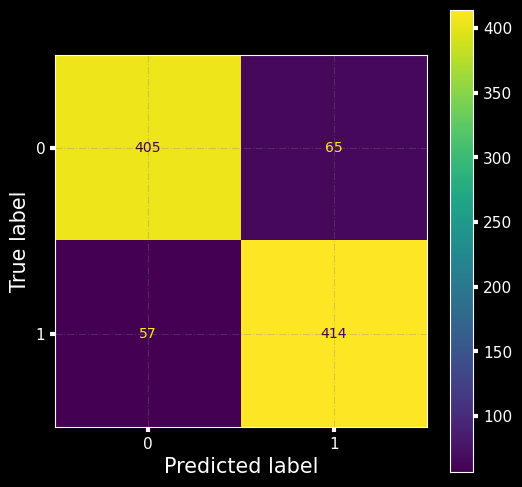

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pop_encoded_pred = xgb_model_pop_prova_fit.predict(X_test)

conf_matrix = confusion_matrix(y_pop_encoded_test, y_pop_encoded_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = xgb_model_pop_prova_fit.classes_)
disp.plot()
plt.show()

In [23]:
from sklearn.metrics import classification_report

print("\n", classification_report(y_pop_encoded_test, y_pop_encoded_pred, digits = 4))


               precision    recall  f1-score   support

           0     0.8766    0.8617    0.8691       470
           1     0.8643    0.8790    0.8716       471

    accuracy                         0.8704       941
   macro avg     0.8705    0.8703    0.8703       941
weighted avg     0.8705    0.8704    0.8703       941



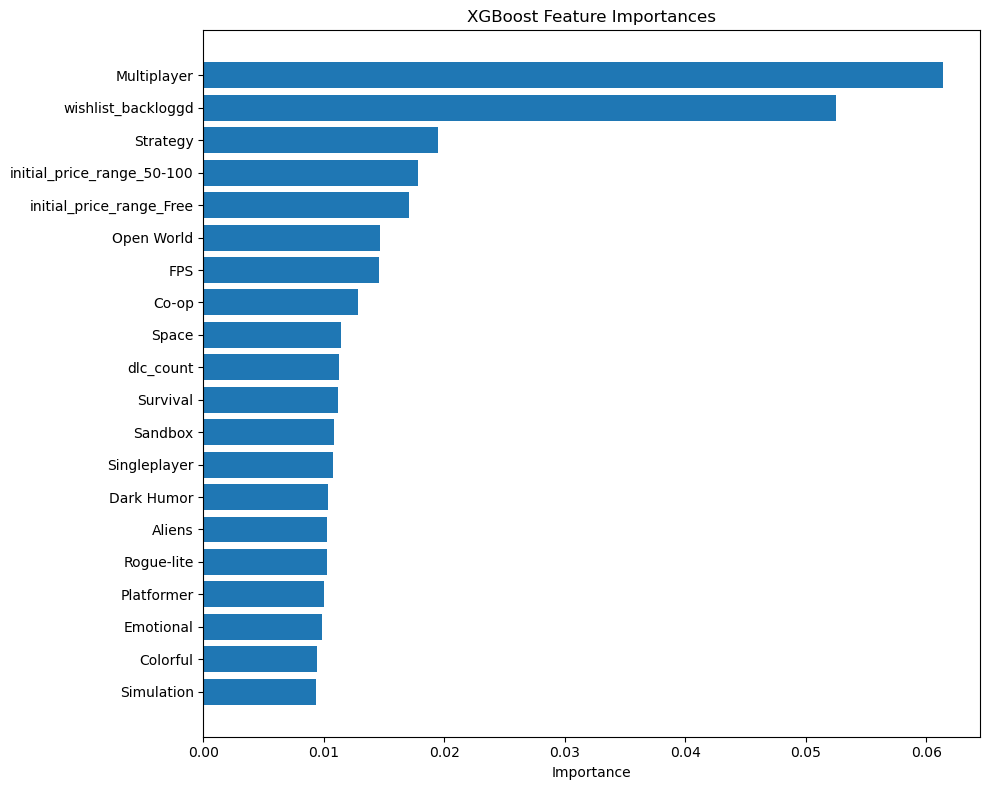

In [24]:
importances_pop = xgb_model_pop_prova_fit.feature_importances_
feature_names = X.columns

indices = np.argsort(importances_pop)[::-1]

plt.figure(figsize=(10, 8))
plt.title("XGBoost Feature Importances")
plt.barh(range(len(indices[:20])), importances_pop[indices[:20]][::-1], align='center')
plt.yticks(range(len(indices[:20])), [feature_names[i] for i in indices[:20]][::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [26]:
# # Traina il modello
# xgb_model_pop_class.fit(X.values, y_pop_class_encoded)

# # Crea explainer SHAP
# explainer = shap.Explainer(xgb_model_pop_class, X)
# shap_values_pop_class = explainer(X)

# # Plot globale delle feature importances
# shap.summary_plot(shap_values_pop_class, X)

# A preliminary prediction for appreciation score

In [25]:
# Classification to predict the 'appreciation_score'

numeric_cols = ['required_age', 'dlc_count', 'year', 'is_indie', 'wishlist_backloggd', 'num_supported_languages', 'num_audio_languages', 'num_platforms']
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols

X = df_prediction[features]
y_appr = pd.cut(df_prediction['appreciation_score'], bins=[0, 0.710561, 1.0], labels=['Low', 'High'], include_lowest=True)


label_encoder = LabelEncoder()
y_appr_encoded = label_encoder.fit_transform(y_appr)

X_train, X_test, y_appr_encoded_train, y_appr_encoded_test = train_test_split(X, y_appr_encoded, test_size=0.2, random_state=42, stratify=y_appr_encoded)


xgb_model_appr = XGBClassifier(
    device='cuda',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=None,
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    use_label_encoder=False  # suppress deprecation warning if needed
)


accuracy_scores = cross_val_score(xgb_model_appr, X_train.values, y_appr_encoded_train, cv=5, scoring='accuracy')
print(f"XGBoost Cross-validated Accuracy: {accuracy_scores.mean():.3f} ± {accuracy_scores.std():.3f}")

f1_scorer = make_scorer(f1_score, average='weighted')
f1_scores = cross_val_score(xgb_model_appr, X_train.values, y_appr_encoded_train, cv=5, scoring=f1_scorer)
print(f"XGBoost Cross-validated Weighted F1: {f1_scores.mean():.3f} ± {f1_scores.std():.3f}")

XGBoost Cross-validated Accuracy: 0.716 ± 0.018
XGBoost Cross-validated Weighted F1: 0.715 ± 0.018


In [26]:
xgb_model_appr_prova_fit = xgb_model_appr.fit(X_train, y_appr_encoded_train)

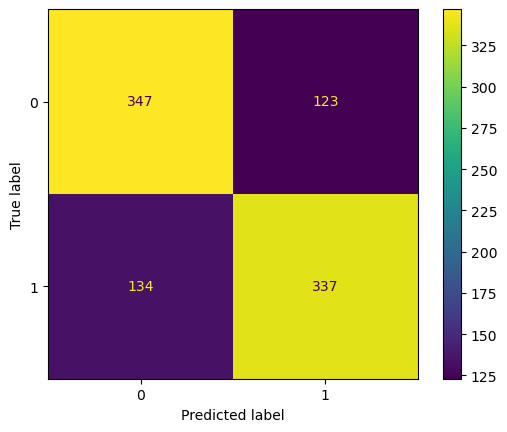

In [27]:
y_appr_encoded_pred = xgb_model_appr_prova_fit.predict(X_test)

conf_matrix = confusion_matrix(y_appr_encoded_test, y_appr_encoded_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = xgb_model_appr_prova_fit.classes_)
disp.plot()
plt.show()

In [28]:
print("\n", classification_report(y_appr_encoded_test, y_appr_encoded_pred, digits = 4))


               precision    recall  f1-score   support

           0     0.7214    0.7383    0.7298       470
           1     0.7326    0.7155    0.7240       471

    accuracy                         0.7269       941
   macro avg     0.7270    0.7269    0.7269       941
weighted avg     0.7270    0.7269    0.7269       941



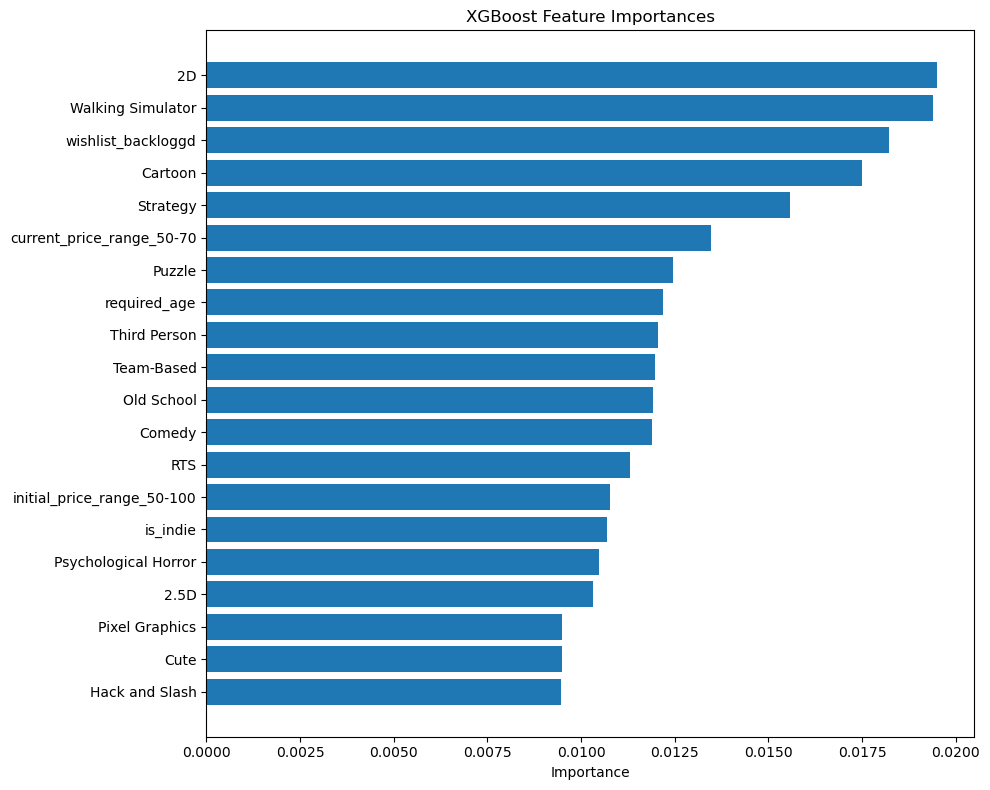

In [29]:
importances_appr = xgb_model_appr_prova_fit.feature_importances_
feature_names = X.columns

indices = np.argsort(importances_appr)[::-1]

plt.figure(figsize=(10, 8))
plt.title("XGBoost Feature Importances")
plt.barh(range(len(indices[:20])), importances_appr[indices[:20]][::-1], align='center')
plt.yticks(range(len(indices[:20])), [feature_names[i] for i in indices[:20]][::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
# # Traina il modello
# xgb_model_appr_class.fit(X.values, y_appr_class_encoded)

# # Crea explainer SHAP
# explainer = shap.Explainer(xgb_model_appr_class, X)
# shap_values_appr_class = explainer(X)

# # Plot globale delle feature importances
# shap.summary_plot(shap_values_appr_class, X)

# Prediction of popularity score (with Grid Search)

In [24]:
# Classification to predict the 'popularity_score'

numeric_cols = ['required_age', 'dlc_count', 'year', 'is_indie', 'wishlist_backloggd', 'num_supported_languages', 'num_audio_languages', 'num_platforms']
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols

X = df_prediction[features]
y_pop = y_pop = pd.cut(df_prediction['popularity_score'], bins=[0, 0.390522, 1.0], labels=['Low', 'High'], include_lowest=True)
label_encoder = LabelEncoder()
y_pop_encoded = label_encoder.fit_transform(y_pop)

X_dev, X_test, y_pop_encoded_dev, y_pop_encoded_test = train_test_split(X, y_pop_encoded, test_size=0.2, random_state=42, stratify=y_pop_encoded)
X_train, X_val, y_pop_encoded_train, y_pop_encoded_val = train_test_split(X_dev, y_pop_encoded_dev, test_size=0.2, random_state=42, stratify=y_pop_encoded_dev)

xgb_model_pop = XGBClassifier(
    device='cuda',
    n_estimators=100,
    learning_rate=0.5,
    max_depth=2,
    subsample = 0.8,               
    colsample_bytree = 0.8,          
    reg_alpha = 0.5,              
    reg_lambda = 0.8,  
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    early_stopping_rounds=20,
    use_label_encoder=False  # suppress deprecation warning if needed
)

In [25]:
xgb_model_pop.fit(X_train, y_pop_encoded_train, eval_set=[(X_train, y_pop_encoded_train), (X_val, y_pop_encoded_val)])

[0]	validation_0-logloss:0.52643	validation_1-logloss:0.52020
[1]	validation_0-logloss:0.45425	validation_1-logloss:0.44496
[2]	validation_0-logloss:0.41589	validation_1-logloss:0.41027
[3]	validation_0-logloss:0.39520	validation_1-logloss:0.39029
[4]	validation_0-logloss:0.37121	validation_1-logloss:0.37195
[5]	validation_0-logloss:0.36015	validation_1-logloss:0.35696
[6]	validation_0-logloss:0.35149	validation_1-logloss:0.34634
[7]	validation_0-logloss:0.33842	validation_1-logloss:0.33307
[8]	validation_0-logloss:0.33138	validation_1-logloss:0.32505
[9]	validation_0-logloss:0.32457	validation_1-logloss:0.31450
[10]	validation_0-logloss:0.31959	validation_1-logloss:0.31303
[11]	validation_0-logloss:0.31263	validation_1-logloss:0.30855
[12]	validation_0-logloss:0.30459	validation_1-logloss:0.30638
[13]	validation_0-logloss:0.30027	validation_1-logloss:0.30162
[14]	validation_0-logloss:0.29405	validation_1-logloss:0.30146
[15]	validation_0-logloss:0.28992	validation_1-logloss:0.29759
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

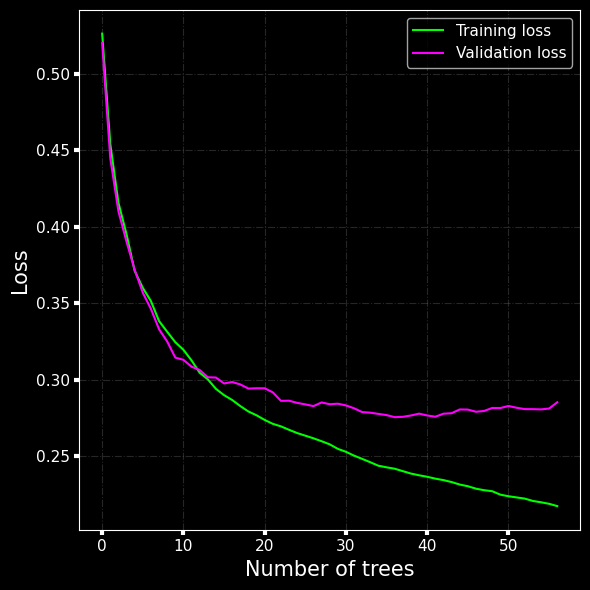

In [26]:
results = xgb_model_pop.evals_result()

#plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss", color='#00ff00')
plt.plot(results["validation_1"]["logloss"], label="Validation loss", color='#ff00ff')
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("assets/images/overfitting_pop.png", bbox_inches='tight', dpi=300)
plt.show()

In [27]:
df['popularity_score'].describe()

count    4703.000000
mean        0.403486
std         0.184554
min         0.000000
25%         0.262559
50%         0.390499
75%         0.533549
max         1.000000
Name: popularity_score, dtype: float64

In [27]:
# Popularity classification Grid Search

# Common feature setup
numeric_cols = [
    'required_age', 'is_indie', 'wishlist_backloggd',
    'num_supported_languages', 'num_audio_languages', 'num_platforms'
]
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols
X = df_prediction[features]

# --- Target binning and encoding ---
y_pop = pd.cut(df_prediction['popularity_score'], bins=[0, 0.390522, 1.0], labels=['Low', 'High'], include_lowest=True)
#y_pop = pd.cut(df_prediction['popularity_score'], bins=[0, 0.262, 0.533, 1.0], labels=['Low', 'Medium', 'High'], include_lowest=True)
#y_pop = pd.qcut(df_prediction['popularity_score'], q=3, labels=['1', '2', '3'])
# Manually map 'Low' → 0, 'High' → 1
y_pop_encoded = y_pop.map({'Low': 0, 'High': 1}).astype(int)

X_train, X_test, y_pop_encoded_train, y_pop_encoded_test = train_test_split(X, y_pop_encoded, test_size=0.2, random_state=42, stratify=y_pop_encoded)

# --- Model ---
xgb_pop = XGBClassifier(
    device='cuda',
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    use_label_encoder=False, # Avoids unnecessary warnings from XGBoost for label encoding.
    objective = 'binary:logistic',  # Outputs probability of the positive class
    eval_metric = 'logloss',        # Binary log loss (cross-entropy)
    #objective='multi:softprob', # Multi-class classification with probability outputs.
    #eval_metric='mlogloss' #  Log loss (cross-entropy) is used for performance monitoring.
)

# param_grid = {
#     'n_estimators': [50],
#     'max_depth': [2, 3],
#     'learning_rate': [0.3],
#     'subsample': [0.5, 0.8],
#     'colsample_bytree': [0.8],
#     'reg_alpha': [0, 0.1, 1],                 # L1 regularization (sparsity)
#     'reg_lambda': [1, 1.5, 2]                 # L2 regularization (shrinkage)
# }

# --- Hyperparameter grid ---
param_grid = {
    'n_estimators': [15, 20, 25],        
    'max_depth': [1, 2],            
    'learning_rate': [0.1, 0.3, 0.5],           
    'subsample': [0.5, 0.8],                 
    'colsample_bytree': [0.5, 0.8],          
    'reg_alpha': [0, 0.5, 0.8],              
    'reg_lambda': [0.5, 0.8, 1],             
}

# --- Accuracy scorer ---
accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score, average='weighted')

# --- Grid Search ---
grid_search_pop = GridSearchCV(
    estimator=xgb_pop,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

# --- Fit Grid Search ---
grid_search_pop.fit(X_train.values, y_pop_encoded_train)

# --- Extract results ---
results_class_pop = pd.DataFrame(grid_search_pop.cv_results_)

# Train and test accuracy from cv_results_
results_class_pop['mean_train_accuracy'] = results_class_pop['mean_train_score']
results_class_pop['mean_test_accuracy'] = results_class_pop['mean_test_score']

# Best params and scores
best_params_pop = grid_search_pop.best_params_
best_test_acc = grid_search_pop.best_score_
best_train_acc = results_class_pop.loc[results_class_pop['rank_test_score'] == 1, 'mean_train_accuracy'].values[0]

print("Best hyperparameters (popularity):", best_params_pop)
print(f"Best cross-validated Test Accuracy (popularity): {best_test_acc:.3f}")
print(f"Train Accuracy for best params (popularity): {best_train_acc:.3f}")


Fitting 10 folds for each of 648 candidates, totalling 6480 fits
Best hyperparameters (popularity): {'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 25, 'reg_alpha': 0.5, 'reg_lambda': 0.8, 'subsample': 0.8}
Best cross-validated Test Accuracy (popularity): 0.865
Train Accuracy for best params (popularity): 0.879


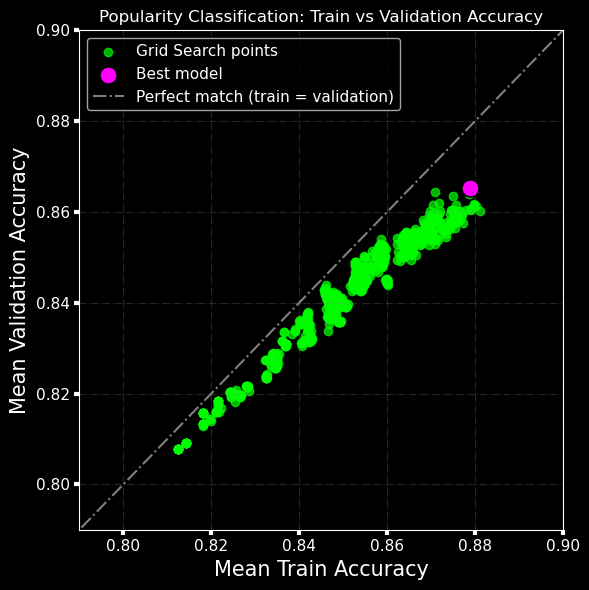

In [28]:
#plt.figure(figsize=(8,6))

# Scatter plot of all points (train vs test accuracy)
plt.scatter(
    results_class_pop['mean_train_accuracy'], 
    results_class_pop['mean_test_accuracy'], 
    alpha=0.7, 
    label='Grid Search points',
    color='#00ff00'
)

# Highlight the best model point
best_train_acc = results_class_pop.loc[results_class_pop['rank_test_score'] == 1, 'mean_train_accuracy'].values[0]
best_test_acc = results_class_pop.loc[results_class_pop['rank_test_score'] == 1, 'mean_test_accuracy'].values[0]
plt.scatter(
    best_train_acc,
    best_test_acc,
    s=150,
    label='Best model',
    edgecolors='black',
    color='#ff00ff'
)

# Reference diagonal line (perfect match train=test)
plt.plot([0, 1], [0, 1], label='Perfect match (train = validation)', color='grey', linestyle = '-.')

plt.xlabel('Mean Train Accuracy')
plt.ylabel('Mean Validation Accuracy')
plt.title('Popularity Classification: Train vs Validation Accuracy')
plt.xlim(0.79,0.9)
plt.ylim(0.79,0.9)
plt.legend()

plt.tight_layout()
plt.savefig("assets/images/overfitting_pop_2.png", bbox_inches='tight', dpi=300)

plt.show()

In [29]:
best_model_pop = grid_search_pop.best_estimator_

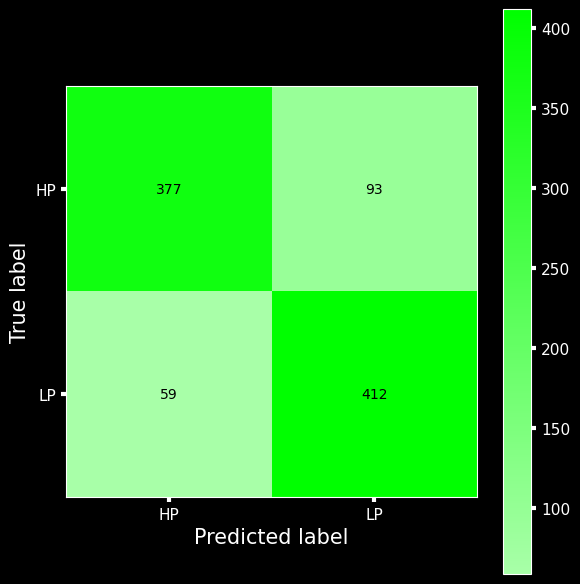

In [30]:
pop_label_map = {0: 'LP',
                 1: 'HP'}

y_pop_encoded_pred = best_model_pop.predict(X_test)
test_pred_pop_df = pd.DataFrame({'y_pop_encoded_test':y_pop_encoded_test, 'y_pop_encoded_pred' : y_pop_encoded_pred}).reset_index(drop=True)

conf_matrix_pop = confusion_matrix(y_pop_encoded_test, y_pop_encoded_pred)
plt.rcParams.update({'axes.grid' : False})
disp = ConfusionMatrixDisplay.from_predictions(test_pred_pop_df['y_pop_encoded_test'].map(pop_label_map), test_pred_pop_df['y_pop_encoded_pred'].map(pop_label_map), cmap=sns.color_palette('blend:#a8ffa8,#00ff00', as_cmap=True), text_kw={'color' : 'black'})
plt.rcParams.update(our_settings)

plt.tight_layout()
plt.savefig("assets/images/confusion_matrix_pop.png", dpi=300)

In [31]:
# y_pop_encoded_pred = best_model_pop.predict(X_test)

# conf_matrix_pop = confusion_matrix(y_pop_encoded_test, y_pop_encoded_pred)
# plt.rcParams.update({'axes.grid' : False})
# disp = ConfusionMatrixDisplay.from_predictions(y_pop_encoded_test, y_pop_encoded_pred, cmap=sns.color_palette('blend:#a8ffa8,#00ff00', as_cmap=True), text_kw={'color' : 'black'})
# plt.rcParams.update(our_settings)

# plt.tight_layout()
# plt.savefig("assets/images/confusion_matrix_pop.png", bbox_inches='tight', dpi=300)

In [31]:
print("\n", classification_report(y_pop_encoded_test, y_pop_encoded_pred, digits = 4))


               precision    recall  f1-score   support

           0     0.8158    0.8747    0.8443       471
           1     0.8647    0.8021    0.8322       470

    accuracy                         0.8385       941
   macro avg     0.8403    0.8384    0.8382       941
weighted avg     0.8402    0.8385    0.8383       941



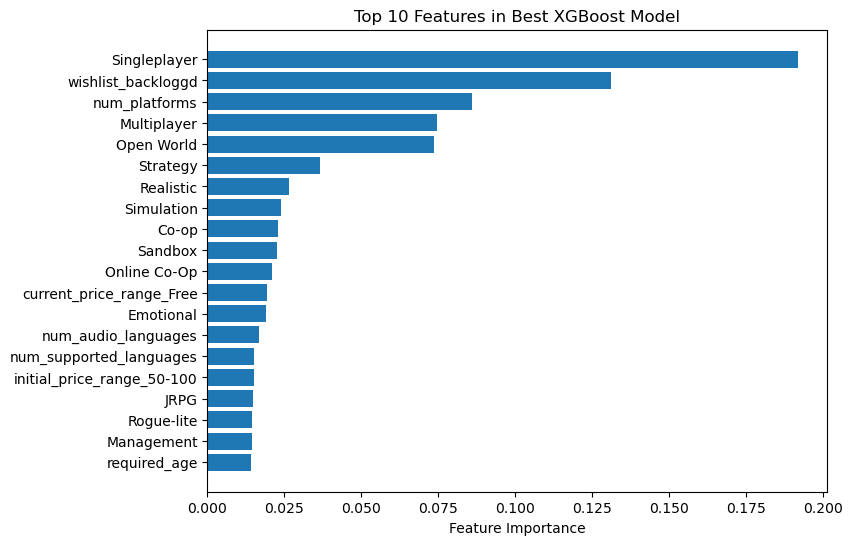

In [63]:
# Get feature importances as an array
importances_pop = best_model_pop.feature_importances_

# Create a DataFrame with feature names and their importance scores
feat_imp_pop_df = pd.DataFrame({
    'feature': features,
    'importance': importances_pop
})

# Sort descending by importance
feat_imp_pop_df = feat_imp_pop_df.sort_values(by='importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 6))
plt.barh(feat_imp_pop_df['feature'].head(20)[::-1], feat_imp_pop_df['importance'].head(20)[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features in Best XGBoost Model')

# plt.tight_layout()
# plt.savefig("assets/images/feature_importance_pop.png", bbox_inches='tight', dpi=300)
# plt.close()

plt.show()

In [30]:
feat_imp_pop_df.reset_index(drop=True)[:15]

,feature,importance
0,Singleplayer,0.191836
1,wishlist_backloggd,0.131107
2,num_platforms,0.086051
3,Multiplayer,0.074618
4,Open World,0.073635
5,Strategy,0.036495
6,Realistic,0.026541
7,Simulation,0.023883
8,Co-op,0.023014
9,Sandbox,0.022631


In trying to decode what makes a game popular, an XGBoost-based predictive model reveals some compelling signals. The model, trained to classify games as either high or low in popularity (with the known threshold of 0.39), highlights both expected and quietly influential features.

At the top of the list is the Singleplayer tag, by far the most important predictor. Despite the rise of multiplayer and live-service games, this suggests a strong and steady demand for solo experiences—perhaps because they offer a curated, personal journey that players still deeply value.

The wishlist count on Backloggd follows closely, underscoring how pre-release interest and visibility on niche platforms can strongly anticipate a game’s traction. Similarly, platform availability (number of platforms supported) ranks high, confirming that broader reach translates into broader attention.

Multiplayer-oriented features like Multiplayer, Co-op, Online Co-Op, and Open World also show up prominently, suggesting that while singleplayer is king in this model, shared and expansive gameplay still plays a significant role in capturing large audiences.

Meanwhile, the presence of tags like Strategy, Simulation, and Realistic indicates that content-rich, genre-driven design elements also correlate with popularity—especially when combined with features like emotional storytelling or a sandbox structure.

Surprisingly, being free (via the current_price_range_Free feature) carries some predictive weight, though not as much as one might expect. And linguistic inclusivity—captured through the number of audio and supported languages—rounds out the list, hinting at the growing importance of accessibility and localization in global success.

In short, popularity isn’t dictated by any single element. It’s an ecosystem of accessibility, platform reach, emotional resonance, and the right blend of game mechanics—showing that success is as much about broad appeal as it is about thoughtful design.

In [32]:
# Make a copy and convert all to numeric (will raise an error if conversion fails)
X_shap = X.copy()
X_shap = X_shap.apply(pd.to_numeric, errors='raise')

In [33]:
# Recompute SHAP values using unified interface
explainer_pop = shap.Explainer(grid_search_pop.best_estimator_)
shap_values_pop = explainer_pop(X_shap)  # returns a shap.Explanation object

print("shap_values shape:", shap_values_pop.values.shape)  # Should be (n_samples, n_classes, n_features)

shap_values shape: (4703, 148)


SHAP Dot Summary Plot for Binary Classification: High vs Low Pop


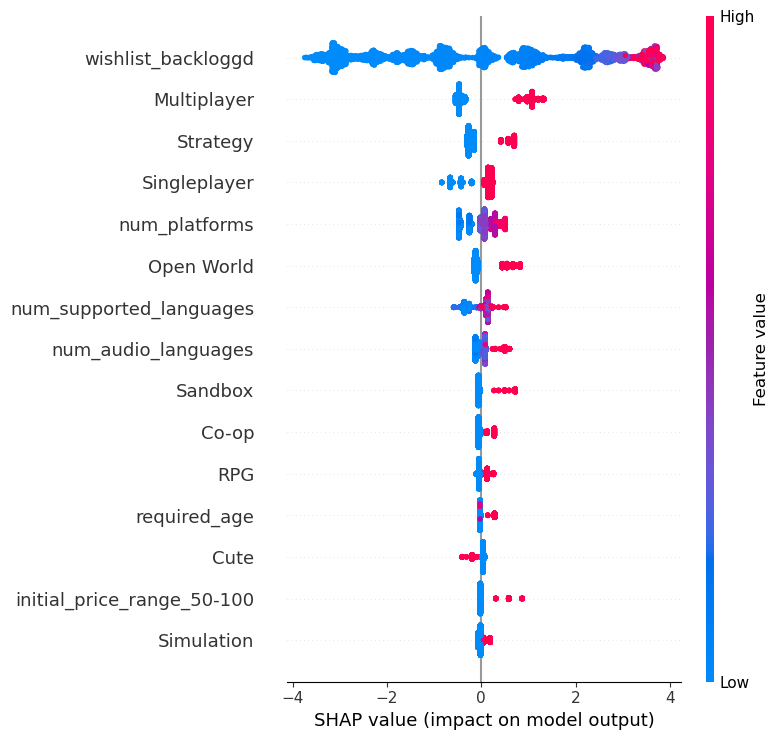

In [34]:
# If your model was trained as binary:logistic, it will output a 1D array of SHAP values
# And shap_values_pop will just have shape (n_samples, n_features)

class_names_pop = ['Low Pop', 'High Pop']

# plt.style.use({
#     'figure.facecolor' : 'black',
#     'xtick.color': 'white',
#     'ytick.color': 'white',
#     'axes.labelcolor': 'white',
#     'text.color': 'white'
# })

plt.style.use('default')
plt.rcParams.update({'axes.grid' : False})

print("SHAP Dot Summary Plot for Binary Classification: High vs Low Pop")
shap.summary_plot(
    shap_values_pop.values,  # or just shap_values_pop if it's not a .values object
    X_shap,
    feature_names=X_shap.columns,
    plot_type='dot',
    max_display=15,
    show=False
)

plt.tight_layout()
plt.savefig("assets/images/shap_summary_plot_pop.png", dpi=300)

plt.style.use('dark_background')
plt.rcParams.update(our_settings)


# class_names_pop = ['Low Pop', 'Mid Pop', 'High Pop']

# for i in range(len(class_names_pop)):
#     print(f"\nSHAP Dot Summary Plot for Class {i}: {class_names_pop[i]}")
#     shap.summary_plot(
#         shap_values_pop.values[:, :, i],
#         X_shap,
#         feature_names=X_shap.columns,
#         plot_type='dot',  # this shows sign and distribution
#         max_display=15
#     )

In [105]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [146]:
df[df['normalized_name'] == 'freudsbonesthegame']

,appid,normalized_name,name,release_date,24h_peak_ccu,all_time_peak_ccu,required_age,dlc_count,about_the_game,summary,supported_languages,full_audio_languages,some_reviews,reviews_total,reviews_score_fancy,header_image,windows,mac,linux,metacritic_url,achievements,recommendations,notes,developers,publishers,categories,genres,tags,screenshots,movies,steam_page,platforms,infos_per_platform,metacritic_score,positive,negative,min_estimated_owners,max_estimated_owners,average_forever,median_forever,current_price,initial_price,discount_percentage,metacritic_user_score,plays_backloggd,playing_backloggd,backlogs_backloggd,wishlist_backloggd,lists_backloggd,reviews_backloggd,likes_backloggd,year,n_crit_revs,n_user_revs,metacritic_user_score_0_100_from_reviews,avg_estimated_owners,num_supported_languages,num_audio_languages,num_platforms,is_missing_metacritic_user_score,metacritic_user_score_filled,is_missing_all_time_peak,all_time_peak_ccu_filled,reviews_bucket,metacritic_user_score_0_100,metacritic_score_difference,metacritic_score_difference_pct,metacritic_score_difference_pct_category,24h_peak_ccu_log,all_time_peak_ccu_filled_log,avg_estimated_owners_log,reviews_total_log,plays_backloggd_log,backlogs_backloggd_log,reviews_backloggd_log,recommendations_log,n_crit_revs_log,n_user_revs_log,popularity_score,appreciation_score,popularity_minus_appreciation,is_indie,initial_price_range,current_price_range
2042,1477980,freudsbonesthegame,Freud's Bones-the game,2022-05-01,2.0,NaN,0,0,Freud's Bones is a surreal and obscure adventu...,Freud's Bones is the first point&click narrati...,"[English, Italian, Spanish - Latin America]",[],“Among the top 5 indie unmissable video games....,77.0,83.0,https://cdn.akamai.steamstatic.com/steam/apps/...,True,False,False,https://www.metacritic.com/game/pc/freuds-bone...,29,0,NaN,[Axel Fox (Fortuna Imperatore)],[Axel Fox (Fortuna Imperatore)],"[Single-player, Steam Achievements]","[Adventure, Indie, RPG, Simulation, Strategy]","[Point & Click, Choose Your Own Adventure, Det...",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,https://store.steampowered.com/app/1477980,"[Nintendo Switch, Windows]",NaN,77.0,64.0,13.0,0.0,20000.0,0.0,0.0,10.99,10.99,0.0,7.9,8.0,0.0,15.0,17.0,5.0,1.0,0.0,2022,7.0,7.0,91.428571,10000.0,3,0,2,0,7.9,1,2.0,0-99,79.0,2.0,2.597403,User ≈ Critic (-5% to +5%),1.098612,1.098612,9.21044,4.356709,2.197225,2.772589,0.693147,0.0,2.079442,2.079442,0.10158,0.776893,-0.675313,True,10-20,10-20


<Axes: xlabel='SHAP value'>

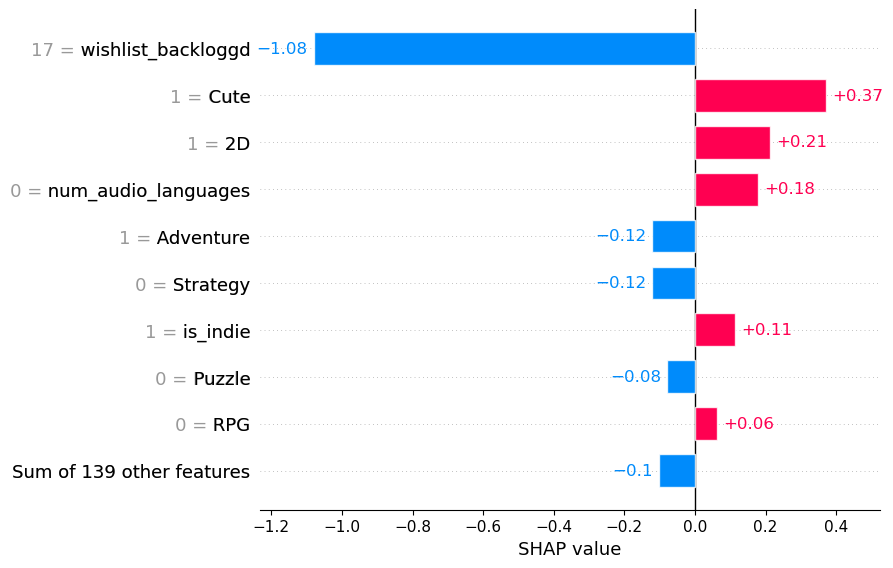

In [149]:
shap.plots.bar(shap_values_appr[2042], show = False)

In [23]:
!pip install aix360

   ---------------------------------------- 0.0/58.4 MB ? eta -:--:--
    --------------------------------------- 1.0/58.4 MB 8.4 MB/s eta 0:00:07
    --------------------------------------- 1.0/58.4 MB 8.4 MB/s eta 0:00:07
   - -------------------------------------- 2.9/58.4 MB 4.4 MB/s eta 0:00:13
   --- ------------------------------------ 4.5/58.4 MB 5.3 MB/s eta 0:00:11
   ---- ----------------------------------- 6.8/58.4 MB 6.5 MB/s eta 0:00:08
   ----- ---------------------------------- 8.7/58.4 MB 6.9 MB/s eta 0:00:08
   ------- -------------------------------- 10.5/58.4 MB 7.1 MB/s eta 0:00:07
   -------- ------------------------------- 12.6/58.4 MB 7.5 MB/s eta 0:00:07
   --------- ------------------------------ 14.4/58.4 MB 7.6 MB/s eta 0:00:06
   ----------- ---------------------------- 16.5/58.4 MB 7.9 MB/s eta 0:00:06
   ------------ --------------------------- 18.9/58.4 MB 8.1 MB/s eta 0:00:05
   -------------- ------------------------- 20.7/58.4 MB 8.2 MB/s eta 0:00:05


In [35]:
len(X_test)

4703

In [36]:
from aix360.metrics import faithfulness_metric, monotonicity_metric

X_test = X_shap.values  # Use your SHAP-ready dataset

base = np.zeros(X_test.shape[1])  # Could also use np.mean(X_test, axis=0)

ncases = 500
faithfulness_scores = []
monotonicity_scores = []

bb = grid_search_pop.best_estimator_

for i in range(ncases):
    x = X_test[i]
    shap_coefs = shap_values_pop.values[i]  # SHAP values for instance i

    # Faithfulness measures how prediction changes with feature removals
    f_score = faithfulness_metric(bb, x, shap_coefs, base)
    m_score = monotonicity_metric(bb, x, shap_coefs, base)

    faithfulness_scores.append(f_score)
    monotonicity_scores.append(m_score)

print("Faithfulness: Mean =", np.mean(faithfulness_scores), 
      "Std Dev =", np.std(faithfulness_scores))

print("Monotonicity: Mean =", np.mean(monotonicity_scores), 
      "Std Dev =", np.std(monotonicity_scores))

Faithfulness: Mean = 0.3659186648237748 Std Dev = 0.5305433474952354
Monotonicity: Mean = 0.242 Std Dev = 0.42829429134649927


In [92]:
# Create dictionary with all stats: conditional + global SHAP
conditional_shap_effects_pop = {}

for feature in X_shap.columns:
    idx = X_shap.columns.get_loc(feature)
    shap_vals_pop = shap_values_pop.values[:, idx]
    vals = X_shap[feature].values

    # Initialize stats dictionary
    stats_pop = {
        'mean_SHAP': shap_vals_pop.mean(),
        'mean_abs_SHAP': np.abs(shap_vals_pop).mean(),
        'std_SHAP': shap_vals_pop.std()
    }

    # Add conditional effects if binary
    if set(np.unique(vals)).issubset({0, 1}):
        stats_pop['mean_SHAP_when_1'] = shap_vals_pop[vals == 1].mean()
        stats_pop['mean_SHAP_when_0'] = shap_vals_pop[vals == 0].mean()
        #stats['mean_abs_SHAP_when_1'] = np.abs(shap_vals[vals == 1]).mean()

    conditional_shap_effects_pop[feature] = stats_pop

# Sort by global importance (mean_abs_SHAP)
sorted_conditional_pop = dict(
    sorted(
        conditional_shap_effects_pop.items(),
        key=lambda item: item[1]['mean_abs_SHAP'],
        reverse=True
    )
)

# Print sorted dictionary
for feature, values in sorted_conditional_pop.items():
    print(f"{feature}: {values}")

wishlist_backloggd: {'mean_SHAP': 0.031100163, 'mean_abs_SHAP': 1.9706122, 'std_SHAP': 2.2679162}
Multiplayer: {'mean_SHAP': 0.014904751, 'mean_abs_SHAP': 0.6491879, 'std_SHAP': 0.70835614, 'mean_SHAP_when_1': 1.0494716, 'mean_SHAP_when_0': -0.46392438}
Strategy: {'mean_SHAP': -0.028513132, 'mean_abs_SHAP': 0.32915375, 'std_SHAP': 0.37663102, 'mean_SHAP_when_1': 0.64680356, 'mean_SHAP_when_0': -0.23297884}
Singleplayer: {'mean_SHAP': -0.006543027, 'mean_abs_SHAP': 0.259197, 'std_SHAP': 0.3118153, 'mean_SHAP_when_1': 0.170185, 'mean_SHAP_when_0': -0.51558393}
num_platforms: {'mean_SHAP': -0.010455942, 'mean_abs_SHAP': 0.25423938, 'std_SHAP': 0.30363405}
Open World: {'mean_SHAP': 0.013875255, 'mean_abs_SHAP': 0.20949264, 'std_SHAP': 0.28929996, 'mean_SHAP_when_1': 0.6136094, 'mean_SHAP_when_0': -0.119572215}
num_supported_languages: {'mean_SHAP': -0.008452225, 'mean_abs_SHAP': 0.17998761, 'std_SHAP': 0.21266699}
num_audio_languages: {'mean_SHAP': 0.01100904, 'mean_abs_SHAP': 0.111907005,

While the XGBoost model highlights key predictors of popularity, SHAP values offer a deeper look at how these features actually influence predictions. Notably, wishlist_backloggd emerges as the most powerful signal, with high values strongly boosting predicted popularity across the board. It’s followed by broad-audience features like Multiplayer, which, when present, tends to significantly increase the likelihood of a game being classified as popular. SHAP confirms this with a strong positive effect when present (+1.05) and a negative one when absent (−0.46).

The same dynamic applies to Strategy: although it shows a negative mean SHAP overall, this is because most games lack the tag. In fact, games with the Strategy tag tend to get a solid boost in popularity prediction (+0.65), showing that strategic depth is a differentiator—but likely a niche one.

Interestingly, Singleplayer, one of the most common tags, has a muted average impact, but its SHAP values again show asymmetry: its presence gives a mild push upward, while its absence pulls scores down more sharply. This suggests that singleplayer design is something of a baseline expectation for popularity.

Features like Open World, Sandbox, and Online Co-Op also show clear positive contributions when present, with Open World in particular offering a sizable lift. Language support metrics—number of audio and subtitle languages—provide small but consistent boosts, likely reflecting the broader accessibility and market reach of those titles.

Meanwhile, tags like Simulation and Cute have more nuanced effects. Despite relatively low absolute SHAP values, their impact is context-dependent. For example, games marked as Cute tend to slightly underperform in popularity predictions, which may reflect a genre-audience mismatch or market oversaturation in that aesthetic.

All in all, the SHAP results complement the model’s feature importance by showing not just what matters, but how it matters—often in ways that are asymmetric and deeply dependent on tag presence.

In [117]:
df.loc[3424]

appid                                        1086940
normalized_name                         baldursgate3
name                                 Baldur's Gate 3
release_date                     2020-10-01 00:00:00
24h_peak_ccu                                101757.0
                                        ...         
appreciation_score                               1.0
popularity_minus_appreciation              -0.049626
is_indie                                       False
initial_price_range                           50-100
current_price_range                            50-70
Name: 3424, Length: 84, dtype: object

In [132]:
df[df['normalized_name'] == 'hollowknight']

,appid,normalized_name,name,release_date,24h_peak_ccu,all_time_peak_ccu,required_age,dlc_count,about_the_game,summary,supported_languages,full_audio_languages,some_reviews,reviews_total,reviews_score_fancy,header_image,windows,mac,linux,metacritic_url,achievements,recommendations,notes,developers,publishers,categories,genres,tags,screenshots,movies,steam_page,platforms,infos_per_platform,metacritic_score,positive,negative,min_estimated_owners,max_estimated_owners,average_forever,median_forever,current_price,initial_price,discount_percentage,metacritic_user_score,plays_backloggd,playing_backloggd,backlogs_backloggd,wishlist_backloggd,lists_backloggd,reviews_backloggd,likes_backloggd,year,n_crit_revs,n_user_revs,metacritic_user_score_0_100_from_reviews,avg_estimated_owners,num_supported_languages,num_audio_languages,num_platforms,is_missing_metacritic_user_score,metacritic_user_score_filled,is_missing_all_time_peak,all_time_peak_ccu_filled,reviews_bucket,metacritic_user_score_0_100,metacritic_score_difference,metacritic_score_difference_pct,metacritic_score_difference_pct_category,24h_peak_ccu_log,all_time_peak_ccu_filled_log,avg_estimated_owners_log,reviews_total_log,plays_backloggd_log,backlogs_backloggd_log,reviews_backloggd_log,recommendations_log,n_crit_revs_log,n_user_revs_log,popularity_score,appreciation_score,popularity_minus_appreciation,is_indie,initial_price_range,current_price_range
3369,367520,hollowknight,Hollow Knight,2017-02-01,8476.0,20169.0,0,2,Hollow Knight Expands with Free Content Godmas...,A 2D metroidvania with an emphasis on close co...,"[English, French, German, Spanish - Spain, Kor...","[English, French, German, Spanish - Spain, Kor...","“It's a deep dive into a dark place, and a bri...",409448.0,97.0,https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,True,https://www.metacritic.com/game/pc/hollow-knig...,63,212301,NaN,[Team Cherry],[Team Cherry],"[Single-player, Steam Achievements, Full contr...","[Action, Adventure, Indie]","[Metroidvania, Souls-like, Platformer, Great S...",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,https://store.steampowered.com/app/367520,"[PlayStation 4, Nintendo Switch, Xbox Series, ...","{'Xbox Series': {'critic_score': nan, 'total_s...",90.0,397330.0,12118.0,10000000.0,20000000.0,1994.0,674.0,14.99,14.99,0.0,9.1,84000.0,7500.0,29000.0,8200.0,10000.0,8500.0,6600.0,2017,58.0,1494.0,88.801874,15000000.0,10,10,6,0,9.1,0,20169.0,100000+,91.0,1.0,1.111111,User ≈ Critic (-5% to +5%),9.045112,9.911952,16.523561,12.922568,11.338584,10.275086,9.047939,12.265765,4.077537,7.309881,0.871313,0.961627,-0.090314,True,10-20,10-20


In [57]:
shap.initjs()

# Choose the index of the instance to explain
i = 3369  # You can change this to any row number in X_shap

print(f"Index: {i}")
print(f"Ground Truth Class: {y_pop_encoded[i]}")
print(f"Predicted Class: {grid_search_pop.best_estimator_.predict(X_shap)[i]}")

# Display the force plot for that instance
print(f"\nSHAP Force Plot for instance {i}")
shap.plots.force(shap_values_pop[i])

Index: 3369
Ground Truth Class: 1
Predicted Class: 1

SHAP Force Plot for instance 3369


In [ ]:
# # Common feature setup
# numeric_cols = [
#     'required_age', 'is_indie', 'wishlist_backloggd',
#     'num_supported_languages', 'num_audio_languages', 'num_platforms'
# ]
# one_hot_cols = df_prediction.columns[82:].to_list()
# features = numeric_cols + one_hot_cols
# X = df_prediction[features]

# # --- Target binning and encoding ---
# #y_pop = pd.cut(df_prediction['popularity_score'], bins=3, labels=[str(i) for i in range(1, 4)])
# y_pop = pd.qcut(df_prediction['popularity_score'], q=3, labels=['1', '2', '3'])
# label_encoder_pop = LabelEncoder()
# y_pop_encoded = label_encoder_pop.fit_transform(y_pop)

# X_train, X_test, y_pop_encoded_train, y_pop_encoded_test = train_test_split(X, y_pop_encoded, test_size=0.2, random_state=42, stratify=y_pop_encoded)

# # --- Model ---
# rf_pop = RandomForestClassifier(
#     random_state=42,
#     n_jobs=-1
# )

# # --- Hyperparameter Grid ---
# param_grid_rf = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [6, 8],
#     'min_samples_split': [5, 8],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# # --- Grid Search ---
# grid_search_pop_rf = GridSearchCV(
#     estimator=rf_pop,
#     param_grid=param_grid_rf,
#     scoring=accuracy_scorer,
#     cv=10,
#     verbose=1,
#     n_jobs=-1,
#     return_train_score=True
# )

# # --- Fit Grid Search ---
# grid_search_pop_rf.fit(X_train.values, y_pop_encoded_train)

# # --- Extract results ---
# results_class_pop_rf = pd.DataFrame(grid_search_pop_rf.cv_results_)

# # Train and test accuracy from cv_results_
# results_class_pop_rf['mean_train_accuracy'] = results_class_pop_rf['mean_train_score']
# results_class_pop_rf['mean_test_accuracy'] = results_class_pop_rf['mean_test_score']

# # Best params and scores
# best_params_pop_rf = grid_search_pop_rf.best_params_
# best_test_acc_pop_rf = grid_search_pop_rf.best_score_
# best_train_acc_pop_rf = results_class_pop_rf.loc[
#     results_class_pop_rf['rank_test_score'] == 1, 'mean_train_accuracy'
# ].values[0]

# print("\nBest hyperparameters (Random Forest - popularity):", best_params_pop_rf)
# print(f"Best cross-validated Test Accuracy (Random Forest - popularity): {best_test_acc_pop_rf:.3f}")
# print(f"Train Accuracy for best params (Random Forest - popularity): {best_train_acc_pop_rf:.3f}")


Fitting 10 folds for each of 96 candidates, totalling 960 fits

Best hyperparameters (Random Forest - popularity): {'bootstrap': False, 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validated Test Accuracy (Random Forest - popularity): 0.723
Train Accuracy for best params (Random Forest - popularity): 0.851


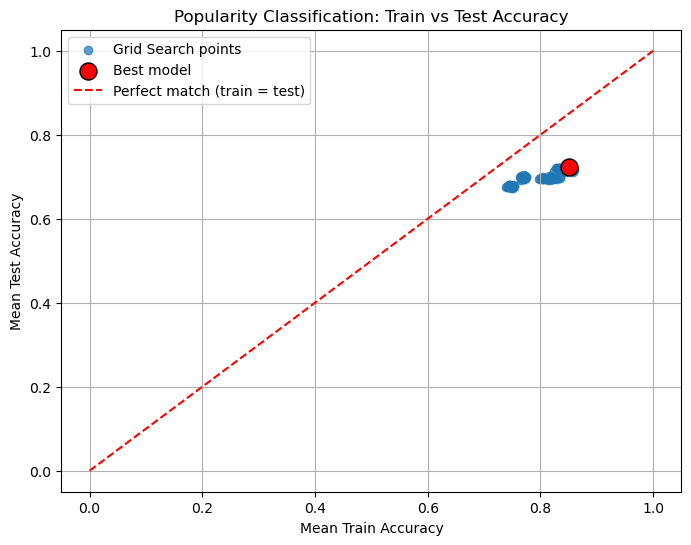

In [ ]:
# plt.figure(figsize=(8,6))

# # Scatter plot of all points (train vs test accuracy)
# plt.scatter(
#     results_class_pop_rf['mean_train_accuracy'], 
#     results_class_pop_rf['mean_test_accuracy'], 
#     alpha=0.7, 
#     label='Grid Search points'
# )

# # Highlight the best model point
# best_train_acc_pop_rf = results_class_pop_rf.loc[results_class_pop_rf['rank_test_score'] == 1, 'mean_train_accuracy'].values[0]
# best_test_acc_pop_rf = results_class_pop_rf.loc[results_class_pop_rf['rank_test_score'] == 1, 'mean_test_accuracy'].values[0]
# plt.scatter(
#     best_train_acc_pop_rf,
#     best_test_acc_pop_rf,
#     color='red',
#     s=150,
#     label='Best model',
#     edgecolors='black'
# )

# # Reference diagonal line (perfect match train=test)
# plt.plot([0, 1], [0, 1], 'r--', label='Perfect match (train = test)')

# plt.xlabel('Mean Train Accuracy')
# plt.ylabel('Mean Test Accuracy')
# plt.title('Popularity Classification: Train vs Test Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# best_model_pop_rf = grid_search_pop_rf.best_estimator_

c:\Users\gioel\anaconda3\envs\env_master_2025\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


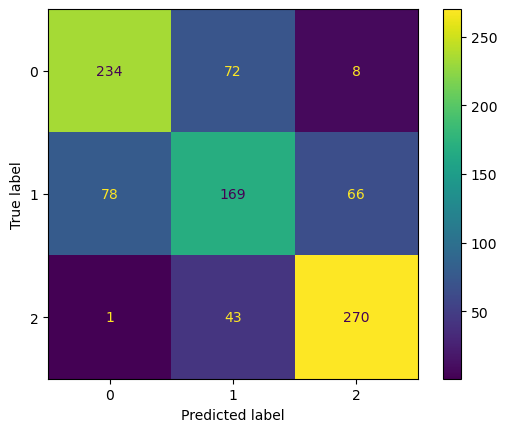

In [ ]:
# y_pop_encoded_pred_rf = best_model_pop_rf.predict(X_test)

# conf_matrix = confusion_matrix(y_pop_encoded_test, y_pop_encoded_pred_rf)
# disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = best_model_pop_rf.classes_)
# disp.plot()
# plt.show()

In [ ]:
# print("\n", classification_report(y_pop_encoded_test, y_pop_encoded_pred_rf, digits = 4))


               precision    recall  f1-score   support

           0     0.7476    0.7452    0.7464       314
           1     0.5951    0.5399    0.5662       313
           2     0.7849    0.8599    0.8207       314

    accuracy                         0.7152       941
   macro avg     0.7092    0.7150    0.7111       941
weighted avg     0.7093    0.7152    0.7112       941



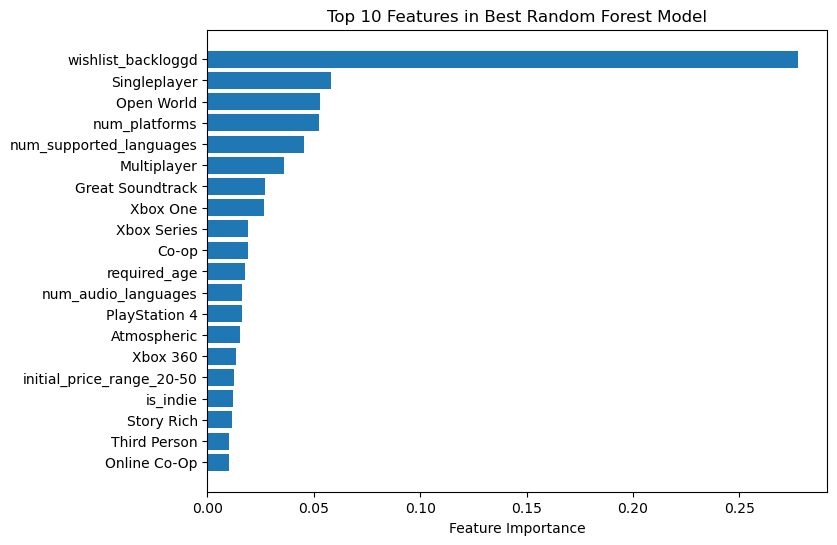

In [ ]:
# # Get feature importances as an array
# importances_pop_rf = best_model_pop_rf.feature_importances_

# # Create a DataFrame with feature names and their importance scores
# feat_imp_pop_df_rf = pd.DataFrame({
#     'feature': features,
#     'importance': importances_pop_rf
# })

# # Sort descending by importance
# feat_imp_pop_df_rf = feat_imp_pop_df_rf.sort_values(by='importance', ascending=False)

# # Plot top 10
# plt.figure(figsize=(8, 6))
# plt.barh(feat_imp_pop_df_rf['feature'].head(20)[::-1], feat_imp_pop_df_rf['importance'].head(20)[::-1])
# plt.xlabel('Feature Importance')
# plt.title('Top 10 Features in Best Random Forest Model')
# plt.show()

# Prediction of appreciation score (with Grid Search)

In [35]:
# Classification to predict the 'appreciation_score'

numeric_cols = ['required_age', 'dlc_count', 'year', 'is_indie', 'wishlist_backloggd', 'num_supported_languages', 'num_audio_languages', 'num_platforms']
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols

X = df_prediction[features]
y_appr = pd.cut(df_prediction['appreciation_score'], bins=[0, 0.710561, 1.0], labels=['Low', 'High'], include_lowest=True)

label_encoder = LabelEncoder()
y_appr_encoded = label_encoder.fit_transform(y_appr)

X_dev, X_test, y_appr_encoded_dev, y_appr_encoded_test = train_test_split(X, y_appr_encoded, test_size=0.2, random_state=42, stratify=y_appr_encoded)
X_train, X_val, y_appr_encoded_train, y_appr_encoded_val = train_test_split(X_dev, y_appr_encoded_dev, test_size=0.2, random_state=42, stratify=y_appr_encoded_dev)

xgb_model_appr = XGBClassifier(
    device='cuda',
    n_estimators=100,
    learning_rate=0.5,
    max_depth=2,
    subsample = 0.8,               
    colsample_bytree = 0.8,          
    reg_alpha = 0.5,              
    reg_lambda = 0.8,  
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    early_stopping_rounds=20,
    use_label_encoder=False  # suppress deprecation warning if needed
)

In [36]:
xgb_model_appr.fit(X_train, y_appr_encoded_train, eval_set=[(X_train, y_appr_encoded_train), (X_val, y_appr_encoded_val)])

[0]	validation_0-logloss:0.62681	validation_1-logloss:0.62394
[1]	validation_0-logloss:0.60141	validation_1-logloss:0.60134
[2]	validation_0-logloss:0.58639	validation_1-logloss:0.58860
[3]	validation_0-logloss:0.57572	validation_1-logloss:0.57404
[4]	validation_0-logloss:0.56426	validation_1-logloss:0.56306
[5]	validation_0-logloss:0.55726	validation_1-logloss:0.55522
[6]	validation_0-logloss:0.55168	validation_1-logloss:0.55349
[7]	validation_0-logloss:0.54361	validation_1-logloss:0.54984
[8]	validation_0-logloss:0.53662	validation_1-logloss:0.54721
[9]	validation_0-logloss:0.53175	validation_1-logloss:0.54598
[10]	validation_0-logloss:0.52720	validation_1-logloss:0.54432
[11]	validation_0-logloss:0.52334	validation_1-logloss:0.53845
[12]	validation_0-logloss:0.51995	validation_1-logloss:0.53587
[13]	validation_0-logloss:0.51680	validation_1-logloss:0.53400
[14]	validation_0-logloss:0.51304	validation_1-logloss:0.53232
[15]	validation_0-logloss:0.50973	validation_1-logloss:0.53139
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

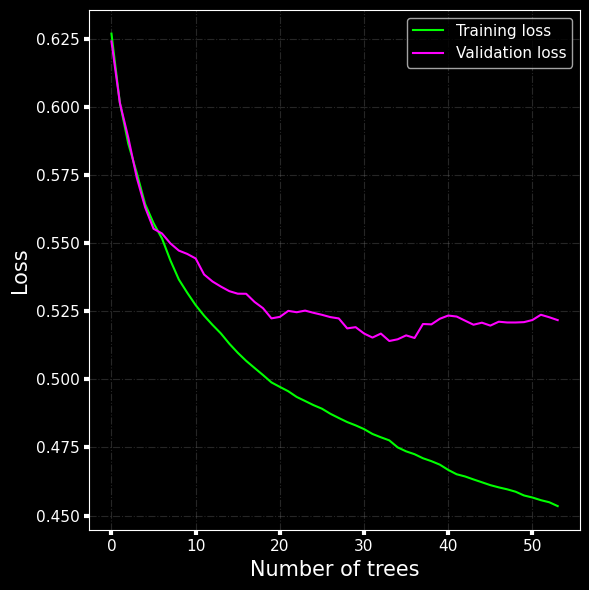

In [37]:
results = xgb_model_appr.evals_result()

#plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["logloss"], label="Training loss", color='#00ff00')
plt.plot(results["validation_1"]["logloss"], label="Validation loss", color='#ff00ff')
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("assets/images/overfitting_appr.png", bbox_inches='tight', dpi=300)

In [38]:
df['appreciation_score'].describe()

count    4703.000000
mean        0.687341
std         0.148020
min         0.000000
25%         0.605652
50%         0.710561
75%         0.794570
max         1.000000
Name: appreciation_score, dtype: float64

In [39]:
# Appreciation classification Grid Search

# Common feature setup
numeric_cols = [
    'required_age', 'is_indie', 'wishlist_backloggd',
    'num_supported_languages', 'num_audio_languages', 'num_platforms'
]
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols
X = df_prediction[features]

# --- Target binning and encoding ---
y_appr = pd.cut(df_prediction['appreciation_score'], bins=[0, 0.710561, 1.0], labels=['Low', 'High'], include_lowest=True)
#y_appr = pd.cut(df_prediction['appreciation_score'], bins=[0, 0.605, 0.794, 1.0], labels=['Low', 'Medium', 'High'], include_lowest=True)
#y_appr = pd.qcut(df_prediction['appreciation_score'], q=2, labels=['1', '2'])
y_appr_encoded = y_appr.map({'Low': 0, 'High': 1}).astype(int)

X_train, X_test, y_appr_encoded_train, y_appr_encoded_test = train_test_split(X, y_appr_encoded, test_size=0.2, random_state=42, stratify=y_appr_encoded)

# --- Model ---
xgb_appr = XGBClassifier(
    device='cuda',
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    use_label_encoder=False,
    objective = 'binary:logistic',  # Outputs probability of the positive class
    eval_metric = 'logloss',        # Binary log loss (cross-entropy)
    #objective='multi:softprob',
    #eval_metric='mlogloss'
)

# --- Hyperparameter grid ---
param_grid = {
    'n_estimators': [15, 20],        
    'max_depth': [1, 2],            
    'learning_rate': [0.3, 0.5],           
    'subsample': [0.5, 0.8],                 
    'colsample_bytree': [0.5, 0.8],          
    'reg_alpha': [0, 0.5, 0.8],              
    'reg_lambda': [0.5, 0.8, 1],             
}

# --- Accuracy scorer ---
accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score, average='weighted')

# --- Grid Search ---
grid_search_appr = GridSearchCV(
    estimator=xgb_appr,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

# --- Fit Grid Search ---
grid_search_appr.fit(X_train.values, y_appr_encoded_train)

# --- Extract results ---
results_class_appr = pd.DataFrame(grid_search_appr.cv_results_)

# Train and test accuracy from cv_results_
results_class_appr['mean_train_accuracy'] = results_class_appr['mean_train_score']
results_class_appr['mean_test_accuracy'] = results_class_appr['mean_test_score']

# Best params and scores
best_params_appr = grid_search_appr.best_params_
best_test_acc = grid_search_appr.best_score_
best_train_acc = results_class_appr.loc[results_class_appr['rank_test_score'] == 1, 'mean_train_accuracy'].values[0]

print("Best hyperparameters (appreciation):", best_params_appr)
print(f"Best cross-validated Test Accuracy (appreciation): {best_test_acc:.3f}")
print(f"Train Accuracy for best params (appreciation): {best_train_acc:.3f}")

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best hyperparameters (appreciation): {'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 20, 'reg_alpha': 0.5, 'reg_lambda': 1, 'subsample': 0.5}
Best cross-validated Test Accuracy (appreciation): 0.724
Train Accuracy for best params (appreciation): 0.745


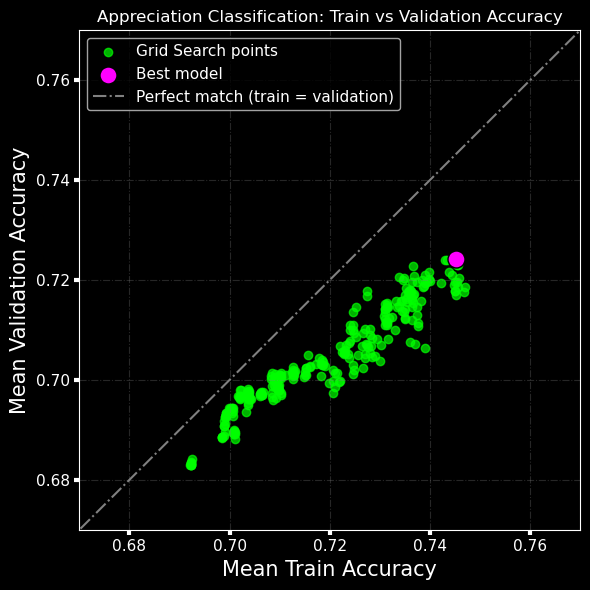

In [40]:
# === Plotting Train vs Test Accuracy for Appreciation ===

#plt.figure(figsize=(8,6), facecolor='black')

plt.scatter(
    results_class_appr['mean_train_accuracy'], 
    results_class_appr['mean_test_accuracy'], 
    alpha=0.7, 
    label='Grid Search points',
    color = '#00ff00'
)

best_train_acc_appr = results_class_appr.loc[results_class_appr['rank_test_score'] == 1, 'mean_train_accuracy'].values[0]
best_test_acc_appr = results_class_appr.loc[results_class_appr['rank_test_score'] == 1, 'mean_test_accuracy'].values[0]

plt.scatter(
    best_train_acc_appr,
    best_test_acc_appr,
    s=150,
    label='Best model',
    edgecolors='black',
    color='#ff00ff'
)

plt.plot([0, 1], [0, 1], label='Perfect match (train = validation)', color='grey', linestyle='-.')

plt.xlabel('Mean Train Accuracy')
plt.ylabel('Mean Validation Accuracy')
plt.title('Appreciation Classification: Train vs Validation Accuracy')
plt.xlim(0.67,0.77)
plt.ylim(0.67,0.77)
plt.legend()

plt.tight_layout()
plt.savefig("assets/images/overfitting_appr_2.png", bbox_inches='tight', dpi=300)

plt.show()

In [43]:
# === Plotting Train vs Test Accuracy for Appreciation ===

# fig, ax = plt.subplots(nrows=1, ncols=1)
# fig.set_facecolor('black')


# ax.set_facecolor('black')
# ax.spines['top'].set_color('white')
# ax.spines['bottom'].set_color('white')
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')

# ax.scatter(
#     results_class_appr['mean_train_accuracy'], 
#     results_class_appr['mean_test_accuracy'], 
#     alpha=0.7, 
#     label='Grid Search points',
#     color = '#00ff00'
# )

# best_train_acc_appr = results_class_appr.loc[results_class_appr['rank_test_score'] == 1, 'mean_train_accuracy'].values[0]
# best_test_acc_appr = results_class_appr.loc[results_class_appr['rank_test_score'] == 1, 'mean_test_accuracy'].values[0]

# ax.scatter(
#     best_train_acc_appr,
#     best_test_acc_appr,
#     color='#ff00ff',
#     s=150,
#     label='Best model',
#     edgecolors='black',
# )

# ax.plot([0, 1], [0, 1], label='Perfect match (train = test)', color='grey', linestyle='-.')

# ax.set_xlabel('Mean Train Accuracy', color = 'white', fontsize=12)
# ax.set_ylabel('Mean Test Accuracy', color = 'white', fontsize=12)
# ax.tick_params(color = 'white', labelcolor = 'white', labelsize = 12, width=2)
# ax.set_title('Appreciation Classification: Train vs Test Accuracy', color = 'white')
# ax.legend(loc='best')
# ax.grid(color = 'white', linestyle = '-.', alpha = 0.3)
# ax.set_xlim(0.6,0.8)
# ax.set_ylim(0.6,0.8)

# # plt.tight_layout()
# # plt.savefig("assets/images/overfitting_appr_2.png", bbox_inches='tight', dpi=300)
# # plt.close()

# plt.show()

In [41]:
best_model_appr = grid_search_appr.best_estimator_

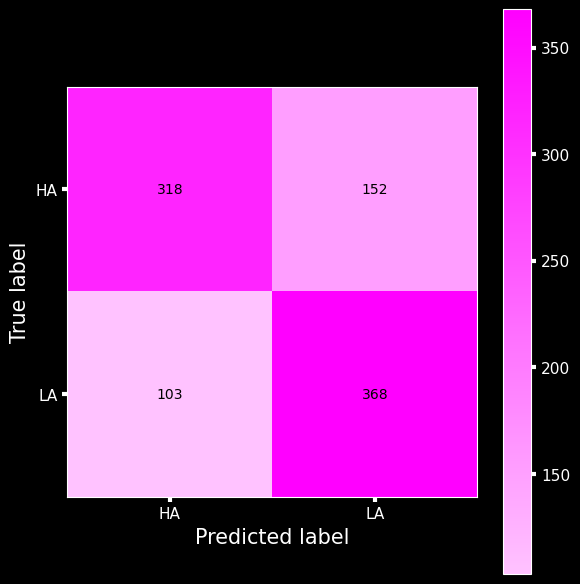

In [42]:
appr_label_map = {0: 'LA',
                  1: 'HA'}

y_appr_encoded_pred = best_model_appr.predict(X_test)
test_pred_appr_df = pd.DataFrame({'y_appr_encoded_test':y_appr_encoded_test, 'y_appr_encoded_pred' : y_appr_encoded_pred}).reset_index(drop=True)

conf_matrix_appr = confusion_matrix(y_appr_encoded_test, y_appr_encoded_pred)
plt.rcParams.update({'axes.grid' : False})
disp = ConfusionMatrixDisplay.from_predictions(test_pred_appr_df['y_appr_encoded_test'].map(appr_label_map), test_pred_appr_df['y_appr_encoded_pred'].map(appr_label_map), cmap=sns.color_palette('blend:#ffc2ff,#ff00ff', as_cmap=True), text_kw={'color' : 'black'})
plt.rcParams.update(our_settings)

plt.tight_layout()
plt.savefig("assets/images/confusion_matrix_appr.png", dpi=300)

In [191]:
# y_appr_encoded_pred = best_model_appr.predict(X_test)

# conf_matrix = confusion_matrix(y_appr_encoded_test, y_appr_encoded_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = best_model_appr.classes_)
# disp.plot()

# # plt.tight_layout()
# # plt.savefig("assets/images/confusion_matrix_appr.png", bbox_inches='tight', dpi=300)
# # plt.close()

# plt.show()

In [43]:
print("\n", classification_report(y_appr_encoded_test, y_appr_encoded_pred, digits = 4))


               precision    recall  f1-score   support

           0     0.7077    0.7813    0.7427       471
           1     0.7553    0.6766    0.7138       470

    accuracy                         0.7290       941
   macro avg     0.7315    0.7290    0.7282       941
weighted avg     0.7315    0.7290    0.7283       941



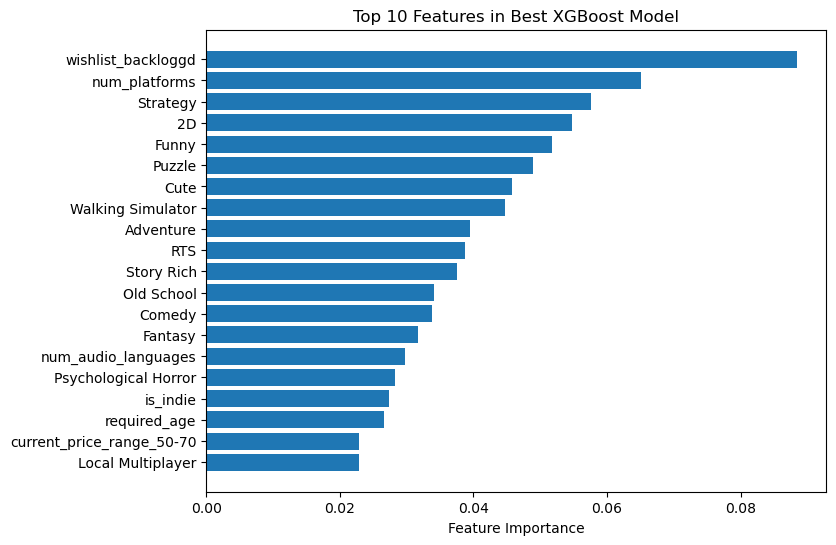

In [89]:
# Get feature importances as an array
importances_appr = best_model_appr.feature_importances_

# Create a DataFrame with feature names and their importance scores
feat_imp_appr_df = pd.DataFrame({
    'feature': features,
    'importance': importances_appr
})

# Sort descending by importance
feat_imp_appr_df = feat_imp_appr_df.sort_values(by='importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 6))
plt.barh(feat_imp_appr_df['feature'].head(20)[::-1], feat_imp_appr_df['importance'].head(20)[::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features in Best XGBoost Model')

# plt.tight_layout()
# plt.savefig("assets/images/feature_importance_appr.png", bbox_inches='tight', dpi=300)
# plt.close()

plt.show()

In [90]:
feat_imp_appr_df.reset_index(drop=True)[:15]

,feature,importance
0,wishlist_backloggd,0.088426
1,num_platforms,0.065123
2,Strategy,0.057633
3,2D,0.054719
4,Funny,0.051719
5,Puzzle,0.048982
6,Cute,0.045774
7,Walking Simulator,0.044706
8,Adventure,0.039443
9,RTS,0.038722


In contrast to what drives popularity, the elements that best predict whether a game will be highly appreciated by players often point to depth, personality, and artistic sensibility rather than scale or marketability.

At the top of the list is once again wishlist_backloggd, whose significance carries over from the popularity model. This variable likely reflects general anticipation and pre-existing goodwill toward a game—factors that often align with critical or player satisfaction as well.

But from there, a different picture emerges. Platform availability (num_platforms) remains important, suggesting appreciated games are often those available across multiple systems—perhaps due to refined quality or wide accessibility.

More strikingly, many of the highest-ranking features reveal tonal and stylistic traits. Tags like Funny, Cute, and Comedy all rank highly, pointing toward a strong player appreciation for charm and humor—qualities that might not guarantee popularity, but tend to earn affection. The same applies to Old School, a tag that evokes nostalgia and classic design, and Walking Simulator, which often denotes narrative-driven, reflective experiences. These genres often win over specific communities despite modest visibility.

Gameplay mechanics also matter, with tags like 2D, Puzzle, and RTS surfacing prominently. These genres typically foster thoughtful, well-crafted gameplay loops that can resonate deeply with players. Similarly, the presence of Story Rich and Adventure confirms that games offering strong narratives and immersive exploration often leave a lasting impression.

The model also points to Strategy as a reliable predictor of appreciation. This suggests that games requiring planning, depth, and tactical thinking are consistently rewarded with higher player sentiment, even if they aren't always mainstream hits.

Finally, technical aspects like num_audio_languages also make the list—implying that better localization and accessibility can meaningfully contribute to user appreciation, likely by reducing barriers and improving immersion.

Altogether, these features paint a picture of appreciated games as thoughtful, expressive, and frequently niche—titles that succeed by forging emotional or intellectual connections, rather than just dominating the marketplace.

In [44]:
# Make a copy and convert all to numeric (will raise an error if conversion fails)
X_shap = X.copy()
X_shap = X_shap.apply(pd.to_numeric, errors='raise')

In [45]:
# Recompute SHAP values using unified interface
explainer_appr = shap.Explainer(grid_search_appr.best_estimator_)
shap_values_appr = explainer_appr(X_shap)  # returns a shap.Explanation object

print("shap_values shape:", shap_values_appr.values.shape)  # Should be (n_samples, n_classes, n_features)

shap_values shape: (4703, 148)


SHAP Dot Summary Plot for Binary Classification: High vs Low Appr


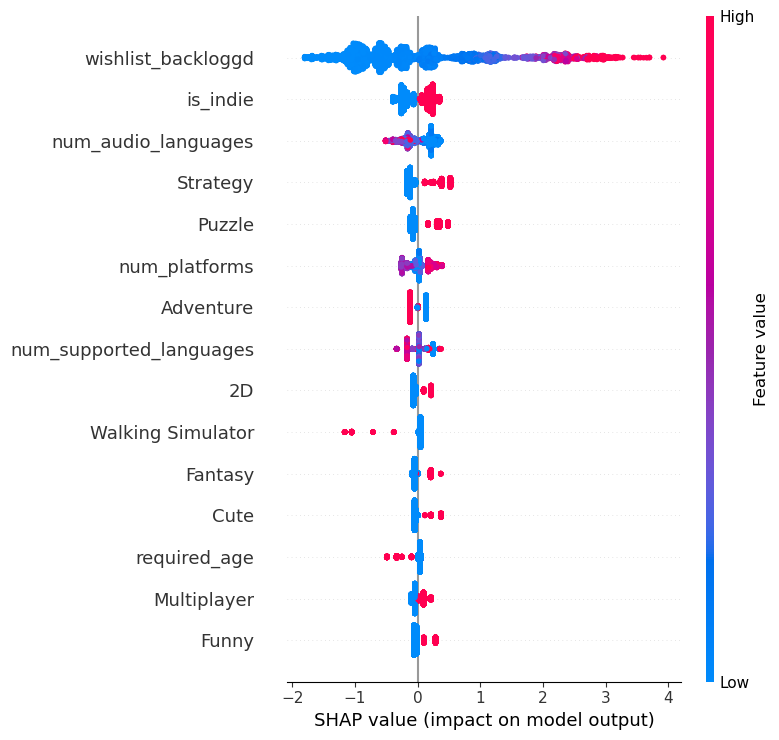

In [47]:
class_names_appr = ['Low Appr', 'High Appr']

plt.style.use('default')
plt.rcParams.update({'axes.grid' : False})

print("SHAP Dot Summary Plot for Binary Classification: High vs Low Appr")
shap.summary_plot(
    shap_values_appr.values,  # or just shap_values_pop if it's not a .values object
    X_shap,
    feature_names=X_shap.columns,
    plot_type='dot',
    max_display=15,
    show=False
)

plt.tight_layout()
plt.savefig("assets/images/shap_summary_plot_appr.png", dpi=300)

plt.style.use('dark_background')
plt.rcParams.update(our_settings)

# plt.tight_layout()
# plt.savefig("assets/images/shap_summary_plot_appr.png", bbox_inches='tight', dpi=300)
# plt.close()

# class_names_appr = ['Low Appr', 'Mid Appr', 'High Appr']

# for i in range(len(class_names_appr)):
#     print(f"\nSHAP Dot Summary Plot for Class {i}: {class_names_appr[i]}")
#     shap.summary_plot(
#         shap_values_appr.values[:, :, i],
#         X_shap,
#         feature_names=X_shap.columns,
#         plot_type='dot',  # this shows sign and distribution
#         max_display=15
#     )

In [93]:
# Create dictionary with all stats: conditional + global SHAP
conditional_shap_effects_appr = {}

for feature in X_shap.columns:
    idx = X_shap.columns.get_loc(feature)
    shap_vals_appr = shap_values_appr.values[:, idx]
    vals = X_shap[feature].values

    # Initialize stats dictionary
    stats_appr = {
        'mean_SHAP': shap_vals_appr.mean(),
        'mean_abs_SHAP': np.abs(shap_vals_appr).mean(),
        'std_SHAP': shap_vals_appr.std()
    }

    # Add conditional effects if binary
    if set(np.unique(vals)).issubset({0, 1}):
        stats_appr['mean_SHAP_when_1'] = shap_vals_appr[vals == 1].mean()
        stats_appr['mean_SHAP_when_0'] = shap_vals_appr[vals == 0].mean()
        #stats['mean_abs_SHAP_when_1'] = np.abs(shap_vals[vals == 1]).mean()

    conditional_shap_effects_appr[feature] = stats_appr

# Sort by global importance (mean_abs_SHAP)
sorted_conditional_appr = dict(
    sorted(
        conditional_shap_effects_appr.items(),
        key=lambda item: item[1]['mean_abs_SHAP'],
        reverse=True
    )
)

# Print sorted dictionary
for feature, values in sorted_conditional_appr.items():
    print(f"{feature}: {values}")

wishlist_backloggd: {'mean_SHAP': 0.065886594, 'mean_abs_SHAP': 0.92601466, 'std_SHAP': 1.1758667}
is_indie: {'mean_SHAP': 0.0015169671, 'mean_abs_SHAP': 0.20166162, 'std_SHAP': 0.21511962, 'mean_SHAP_when_1': 0.19319628, 'mean_SHAP_when_0': -0.2110494}
num_audio_languages: {'mean_SHAP': 0.013568695, 'mean_abs_SHAP': 0.19527191, 'std_SHAP': 0.21469931}
Strategy: {'mean_SHAP': -0.0047129015, 'mean_abs_SHAP': 0.19207175, 'std_SHAP': 0.23495497, 'mean_SHAP_when_1': 0.40308723, 'mean_SHAP_when_0': -0.12818258}
Puzzle: {'mean_SHAP': 0.0011991508, 'mean_abs_SHAP': 0.12874119, 'std_SHAP': 0.1712039, 'mean_SHAP_when_1': 0.3421665, 'mean_SHAP_when_0': -0.07871787}
num_platforms: {'mean_SHAP': -0.004812985, 'mean_abs_SHAP': 0.12228354, 'std_SHAP': 0.1584627}
Adventure: {'mean_SHAP': -0.0071329405, 'mean_abs_SHAP': 0.1160532, 'std_SHAP': 0.12103038, 'mean_SHAP_when_1': -0.11024597, 'mean_SHAP_when_0': 0.12233943}
num_supported_languages: {'mean_SHAP': -6.7414614e-05, 'mean_abs_SHAP': 0.11303494, 

While the feature importance scores gave a broad view of which characteristics matter most in predicting game appreciation, the SHAP values offer a richer, more individualized look into how these features actually influence the model’s decisions — and the insights are both affirming and revealing.

Unsurprisingly, wishlist_backloggd stands out again with the highest average impact on the model’s output, indicating that games with high wishlist counts on Backloggd consistently trend toward higher appreciation scores. This suggests that community-driven anticipation and affinity often align with actual satisfaction — a vote of confidence in pre-release buzz as a barometer of long-term acclaim.

A particularly telling feature is is_indie, which exhibits a very small global mean SHAP but a striking difference in localized contributions: when the tag is active (i.e., the game is indie), it positively contributes to appreciation scores (mean SHAP ≈ +0.19), while non-indie titles tend to have a negative SHAP effect (≈ –0.21). In other words, indie status itself is often a positive signal for appreciation, even if the overall magnitude varies across cases.

Tags like Strategy, Puzzle, Cute, and Funny also show strong positive contributions when active. In particular, strategy games and puzzlers appear to be consistently well-received — their SHAP values suggest that games featuring these genres are not just loved by niche audiences, but are systematically rated more highly.

On the technical and accessibility front, features like num_audio_languages and num_supported_languages also play meaningful roles. More audio options correlate positively with appreciation, hinting at a broader principle: accessibility and polish enhance player satisfaction, even if subtly.

Some surprises emerge too. The tag Walking Simulator, for instance, has a high variability and a strongly negative SHAP when active (≈ –0.96). This suggests that while some walking sims might thrive, the tag overall dampens appreciation predictions, perhaps due to its divisive nature or unmet expectations among certain audiences.

Similarly, the tag Adventure, while popular, shows a slight negative contribution when present. This could reflect the term’s broad usage — spanning everything from rich narrative epics to lighter genre blends — diluting its predictive power for high-quality experiences.

Meanwhile, 2D and Fantasy tags show moderate but consistent positive SHAP when present, reinforcing the idea that stylized or imaginative aesthetics tend to resonate with appreciative players.

Lastly, Multiplayer, often a strong predictor for popularity, plays a more muted role here — when present, it contributes positively, but only modestly. This suggests that social features alone aren't a guarantee of player acclaim, unless coupled with other strengths like design depth or emotional engagement.

Overall, the SHAP analysis reinforces that player appreciation hinges more on thoughtful design, accessibility, emotional tone, and innovation than on commercial scale or multiplayer features. Games that dare to be clever, cute, or strategic — and that speak to their audiences with care — are the ones that leave the deepest impressions.

In [129]:
df.loc[3424]

appid                                        1086940
normalized_name                         baldursgate3
name                                 Baldur's Gate 3
release_date                     2020-10-01 00:00:00
24h_peak_ccu                                101757.0
                                        ...         
appreciation_score                               1.0
popularity_minus_appreciation              -0.049626
is_indie                                       False
initial_price_range                           50-100
current_price_range                            50-70
Name: 3424, Length: 84, dtype: object

In [126]:
df[df['normalized_name'] == 'baldursgate3']

,appid,normalized_name,name,release_date,24h_peak_ccu,all_time_peak_ccu,required_age,dlc_count,about_the_game,summary,supported_languages,full_audio_languages,some_reviews,reviews_total,reviews_score_fancy,header_image,windows,mac,linux,metacritic_url,achievements,recommendations,notes,developers,publishers,categories,genres,tags,screenshots,movies,steam_page,platforms,infos_per_platform,metacritic_score,positive,negative,min_estimated_owners,max_estimated_owners,average_forever,median_forever,current_price,initial_price,discount_percentage,metacritic_user_score,plays_backloggd,playing_backloggd,backlogs_backloggd,wishlist_backloggd,lists_backloggd,reviews_backloggd,likes_backloggd,year,n_crit_revs,n_user_revs,metacritic_user_score_0_100_from_reviews,avg_estimated_owners,num_supported_languages,num_audio_languages,num_platforms,is_missing_metacritic_user_score,metacritic_user_score_filled,is_missing_all_time_peak,all_time_peak_ccu_filled,reviews_bucket,metacritic_user_score_0_100,metacritic_score_difference,metacritic_score_difference_pct,metacritic_score_difference_pct_category,24h_peak_ccu_log,all_time_peak_ccu_filled_log,avg_estimated_owners_log,reviews_total_log,plays_backloggd_log,backlogs_backloggd_log,reviews_backloggd_log,recommendations_log,n_crit_revs_log,n_user_revs_log,popularity_score,appreciation_score,popularity_minus_appreciation,is_indie,initial_price_range,current_price_range
3424,1086940,baldursgate3,Baldur's Gate 3,2020-10-01,101757.0,875343.0,17,0,"Gather your party, and return to the Forgotten...","An ancient evil has returned to Baldur's Gate,...","[English, French, German, Spanish - Spain, Pol...","[English, Portuguese - Brazil]",NaN,748522.0,97.0,https://cdn.akamai.steamstatic.com/steam/apps/...,True,True,False,https://www.metacritic.com/game/pc/baldurs-gat...,0,47161,This Game may contain content not appropriate ...,[Larian Studios],[Larian Studios],"[Single-player, Multi-player, Co-op, Online Co...","[Adventure, RPG, Strategy, Early Access]","[Early Access, RPG, Choices Matter, Character ...",[https://cdn.akamai.steamstatic.com/steam/apps...,[http://cdn.akamai.steamstatic.com/steam/apps/...,https://store.steampowered.com/app/1086940,"[PlayStation 5, Google Stadia, Windows, Mac]",NaN,96.0,724936.0,23586.0,20000000.0,50000000.0,7364.0,5012.0,59.99,59.99,0.0,9.2,48000.0,14000.0,21000.0,15000.0,7500.0,6500.0,5200.0,2020,169.0,7004.0,92.488578,35000000.0,9,2,4,0,9.2,0,875343.0,100000+,92.0,-4.0,-4.166667,User ≈ Critic (-5% to +5%),11.530353,13.682372,17.370859,13.525857,10.778977,9.952325,8.779711,10.761344,5.135798,8.854379,0.950374,1.0,-0.049626,False,50-100,50-70


In [ ]:
shap.initjs()

# Choose the index of the instance to explain
i = 3424  # You can change this to any row number in X_shap

print(f"Index: {i}")
print(f"Ground Truth Class: {y_appr_encoded[i]}")
print(f"Predicted Class: {grid_search_appr.best_estimator_.predict(X_shap)[i]}")

plt.figure(figsize=(18, 4)) 
# Display the force plot for that instance
print(f"\nSHAP Force Plot for instance {i}")
shap.plots.force(shap_values_appr[i])

# force_plot = shap.plots.force(shap_values_appr[i])
# shap.save_html("shap_force_plot_appr_bg3.html", force_plot)

Index: 3424
Ground Truth Class: 1
Predicted Class: 1

SHAP Force Plot for instance 3424


In [ ]:
# # Common feature setup
# numeric_cols = [
#     'required_age', 'is_indie', 'wishlist_backloggd',
#     'num_supported_languages', 'num_audio_languages', 'num_platforms'
# ]
# one_hot_cols = df_prediction.columns[82:].to_list()
# features = numeric_cols + one_hot_cols
# X = df_prediction[features]

# # --- Target binning and encoding ---
# #y_pop = pd.cut(df_prediction['appreciation_score'], bins=3, labels=[str(i) for i in range(1, 4)])
# y_appr = pd.qcut(df_prediction['appreciation_score'], q=3, labels=['1', '2', '3'])
# label_encoder_appr = LabelEncoder()
# y_appr_encoded = label_encoder_appr.fit_transform(y_appr)

# X_train, X_test, y_appr_encoded_train, y_appr_encoded_test = train_test_split(X, y_appr_encoded, test_size=0.2, random_state=42, stratify=y_appr_encoded)

# # --- Model ---
# rf_appr = RandomForestClassifier(
#     random_state=42,
#     n_jobs=-1
# )

# # --- Hyperparameter Grid ---
# param_grid_rf = {
#     'n_estimators': [100, 150, 200],
#     'max_depth': [3, 6],
#     'min_samples_split': [5, 8],
#     'min_samples_leaf': [1, 2],
#     'max_features': ['sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# # --- Grid Search ---
# grid_search_appr_rf = GridSearchCV(
#     estimator=rf_appr,
#     param_grid=param_grid_rf,
#     scoring=accuracy_scorer,
#     cv=10,
#     verbose=1,
#     n_jobs=-1,
#     return_train_score=True
# )

# # --- Fit Grid Search ---
# grid_search_appr_rf.fit(X_train.values, y_appr_encoded_train)

# # --- Extract results ---
# results_class_appr_rf = pd.DataFrame(grid_search_appr_rf.cv_results_)

# # Train and test accuracy from cv_results_
# results_class_appr_rf['mean_train_accuracy'] = results_class_appr_rf['mean_train_score']
# results_class_appr_rf['mean_test_accuracy'] = results_class_appr_rf['mean_test_score']

# # Best params and scores
# best_params_appr_rf = grid_search_appr_rf.best_params_
# best_test_acc_appr_rf = grid_search_appr_rf.best_score_
# best_train_acc_appr_rf = results_class_appr_rf.loc[
#     results_class_appr_rf['rank_test_score'] == 1, 'mean_train_accuracy'
# ].values[0]

# print("\nBest hyperparameters (Random Forest - popularity):", best_params_appr_rf)
# print(f"Best cross-validated Test Accuracy (Random Forest - popularity): {best_test_acc_appr_rf:.3f}")
# print(f"Train Accuracy for best params (Random Forest - popularity): {best_train_acc_appr_rf:.3f}")

Fitting 10 folds for each of 96 candidates, totalling 960 fits

Best hyperparameters (Random Forest - popularity): {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validated Test Accuracy (Random Forest - popularity): 0.543
Train Accuracy for best params (Random Forest - popularity): 0.638


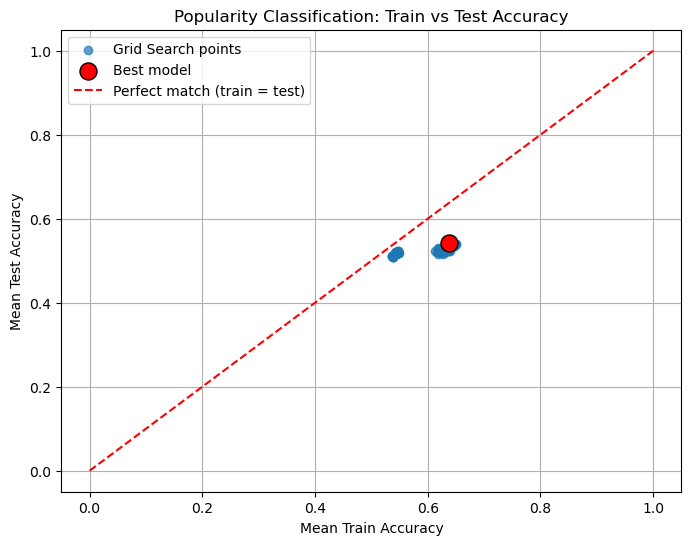

In [ ]:
# plt.figure(figsize=(8,6))

# # Scatter plot of all points (train vs test accuracy)
# plt.scatter(
#     results_class_appr_rf['mean_train_accuracy'], 
#     results_class_appr_rf['mean_test_accuracy'], 
#     alpha=0.7, 
#     label='Grid Search points'
# )

# # Highlight the best model point
# best_train_acc_appr_rf = results_class_appr_rf.loc[results_class_appr_rf['rank_test_score'] == 1, 'mean_train_accuracy'].values[0]
# best_test_acc_appr_rf = results_class_appr_rf.loc[results_class_appr_rf['rank_test_score'] == 1, 'mean_test_accuracy'].values[0]
# plt.scatter(
#     best_train_acc_appr_rf,
#     best_test_acc_appr_rf,
#     color='red',
#     s=150,
#     label='Best model',
#     edgecolors='black'
# )

# # Reference diagonal line (perfect match train=test)
# plt.plot([0, 1], [0, 1], 'r--', label='Perfect match (train = test)')

# plt.xlabel('Mean Train Accuracy')
# plt.ylabel('Mean Test Accuracy')
# plt.title('Popularity Classification: Train vs Test Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# best_model_appr_rf = grid_search_appr_rf.best_estimator_

c:\Users\gioel\anaconda3\envs\env_master_2025\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


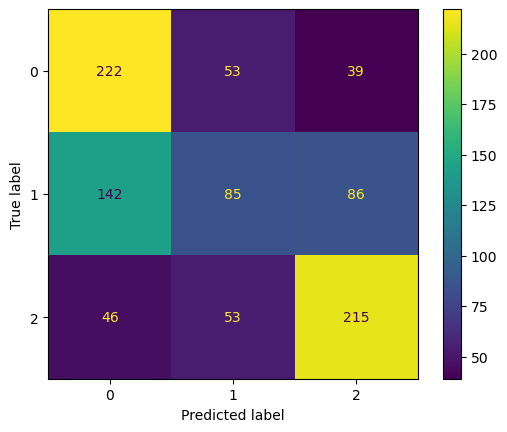

In [ ]:
# y_appr_encoded_pred_rf = best_model_appr_rf.predict(X_test)

# conf_matrix = confusion_matrix(y_appr_encoded_test, y_appr_encoded_pred_rf)
# disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = best_model_appr_rf.classes_)
# disp.plot()
# plt.show()

In [ ]:
# print("\n", classification_report(y_appr_encoded_test, y_appr_encoded_pred_rf, digits = 4))


               precision    recall  f1-score   support

           0     0.5415    0.7070    0.6133       314
           1     0.4450    0.2716    0.3373       313
           2     0.6324    0.6847    0.6575       314

    accuracy                         0.5547       941
   macro avg     0.5396    0.5544    0.5360       941
weighted avg     0.5397    0.5547    0.5362       941



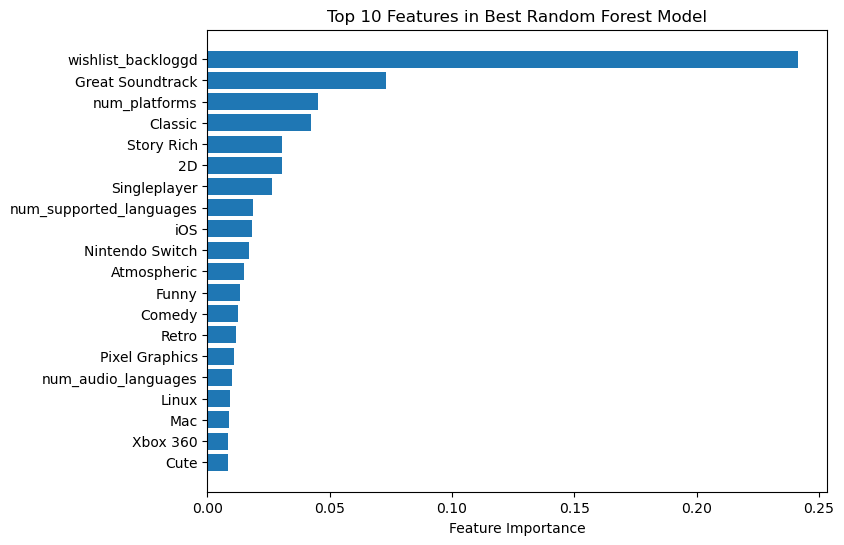

In [ ]:
# # Get feature importances as an array
# importances_appr_rf = best_model_appr_rf.feature_importances_

# # Create a DataFrame with feature names and their importance scores
# feat_imp_appr_df_rf = pd.DataFrame({
#     'feature': features,
#     'importance': importances_appr_rf
# })

# # Sort descending by importance
# feat_imp_appr_df_rf = feat_imp_appr_df_rf.sort_values(by='importance', ascending=False)

# # Plot top 10
# plt.figure(figsize=(8, 6))
# plt.barh(feat_imp_appr_df_rf['feature'].head(20)[::-1], feat_imp_appr_df_rf['importance'].head(20)[::-1])
# plt.xlabel('Feature Importance')
# plt.title('Top 10 Features in Best Random Forest Model')
# plt.show()

# Combining both scores

In [48]:
from sklearn.utils.class_weight import compute_sample_weight

# --- Feature setup ---
numeric_cols = [
    'required_age', 'is_indie', 'wishlist_backloggd',
    'num_supported_languages', 'num_audio_languages', 'num_platforms'
]
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols
X = df_prediction[features]

# --- Use median (50th percentile) thresholds ---
app_thresh = df_prediction['appreciation_score'].median()
pop_thresh = df_prediction['popularity_score'].median()

# --- Binning into 0 or 1 based on medians ---
appreciation_bin = (df_prediction['appreciation_score'] > app_thresh).astype(int)
popularity_bin = (df_prediction['popularity_score'] > pop_thresh).astype(int)

# --- Compute quadrant label: 0, 1, 2, 3
# 0: low app, low pop
# 1: low app, high pop
# 2: high app, low pop
# 3: high app, high pop
y_quadrant = 2 * appreciation_bin + popularity_bin

# --- Split Data ---
X_dev, X_test, y_dev, y_test = train_test_split(
    X, y_quadrant, test_size=0.2, random_state=42, stratify=y_quadrant
)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.2, random_state=42, stratify=y_dev)

# --- Compute sample weights for training set ---
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

xgb_model_quad = XGBClassifier(
    device='cuda',
    n_estimators=100,
    learning_rate=0.5,
    max_depth=2,
    subsample = 0.8,               
    colsample_bytree = 0.8,          
    reg_alpha = 0,              
    reg_lambda = 0.5,  
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    early_stopping_rounds=20,
    use_label_encoder=False  # suppress deprecation warning if needed
)

In [49]:
xgb_model_quad.fit(X_train, y_train, sample_weight=sample_weights, eval_set=[(X_train, y_train), (X_val, y_val)])

[0]	validation_0-mlogloss:1.24886	validation_1-mlogloss:1.26545
[1]	validation_0-mlogloss:1.16263	validation_1-mlogloss:1.18299
[2]	validation_0-mlogloss:1.10654	validation_1-mlogloss:1.13537
[3]	validation_0-mlogloss:1.04849	validation_1-mlogloss:1.08077
[4]	validation_0-mlogloss:1.01025	validation_1-mlogloss:1.05198
[5]	validation_0-mlogloss:0.98089	validation_1-mlogloss:1.02566
[6]	validation_0-mlogloss:0.96162	validation_1-mlogloss:1.01260
[7]	validation_0-mlogloss:0.94146	validation_1-mlogloss:0.98948
[8]	validation_0-mlogloss:0.92640	validation_1-mlogloss:0.98218
[9]	validation_0-mlogloss:0.91435	validation_1-mlogloss:0.97346
[10]	validation_0-mlogloss:0.90482	validation_1-mlogloss:0.96796
[11]	validation_0-mlogloss:0.89554	validation_1-mlogloss:0.96418
[12]	validation_0-mlogloss:0.88658	validation_1-mlogloss:0.95869
[13]	validation_0-mlogloss:0.87816	validation_1-mlogloss:0.95913
[14]	validation_0-mlogloss:0.86811	validation_1-mlogloss:0.95348
[15]	validation_0-mlogloss:0.86187	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=20,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_parallel_tree=None, ...)

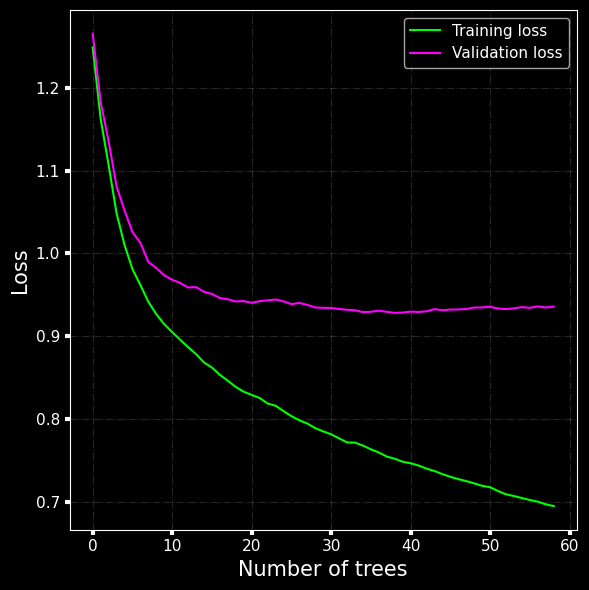

In [50]:
results = xgb_model_quad.evals_result()

#plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["mlogloss"], label="Training loss", color = '#00ff00')
plt.plot(results["validation_1"]["mlogloss"], label="Validation loss", color = '#ff00ff')
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.savefig("assets/images/overfitting_quad.png", bbox_inches='tight', dpi=300)

In [51]:
from sklearn.utils.class_weight import compute_sample_weight

# --- Feature setup ---
numeric_cols = [
    'required_age', 'is_indie', 'wishlist_backloggd',
    'num_supported_languages', 'num_audio_languages', 'num_platforms'
]
one_hot_cols = df_prediction.columns[81:].to_list()
features = numeric_cols + one_hot_cols
X = df_prediction[features]

# --- Use median (50th percentile) thresholds ---
app_thresh = df_prediction['appreciation_score'].median()
pop_thresh = df_prediction['popularity_score'].median()

# --- Binning into 0 or 1 based on medians ---
appreciation_bin = (df_prediction['appreciation_score'] > app_thresh).astype(int)
popularity_bin = (df_prediction['popularity_score'] > pop_thresh).astype(int)

# --- Compute quadrant label: 0, 1, 2, 3
# 0: low app, low pop
# 1: low app, high pop
# 2: high app, low pop
# 3: high app, high pop
y_quadrant = 2 * appreciation_bin + popularity_bin

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y_quadrant, test_size=0.2, random_state=42, stratify=y_quadrant
)

# --- Compute sample weights for training set ---
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# --- Model Setup ---
xgb_model = XGBClassifier(
    device='cuda',
    random_state=42,
    n_jobs=-1,
    verbosity=0,
    use_label_encoder=False,
    objective='multi:softprob',
    eval_metric='mlogloss'
)

# --- Hyperparameter Grid ---
param_grid = {
    'n_estimators': [15, 20],
    'max_depth': [1, 2],
    'learning_rate': [0.3, 0.5],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 0.8],
    'reg_alpha': [0, 0.5, 0.8],
    'reg_lambda': [0.5, 0.8, 1],
}

# --- Scoring ---
accuracy_scorer = make_scorer(accuracy_score)
f1_scorer = make_scorer(f1_score, average='weighted')

# --- Grid Search ---
grid_search_quad = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)

# --- Fit with sample_weight ---
grid_search_quad.fit(X_train.values, y_train, sample_weight=sample_weights)

# --- Results ---
results_class_quad = pd.DataFrame(grid_search_quad.cv_results_)
results_class_quad['mean_train_accuracy'] = results_class_quad['mean_train_score']
results_class_quad['mean_test_accuracy'] = results_class_quad['mean_test_score']

best_params_quad = grid_search_quad.best_params_
best_test_acc_quad = grid_search_quad.best_score_
best_train_acc_quad = results_class_quad.loc[
    results_class_quad['rank_test_score'] == 1, 'mean_train_accuracy'
].values[0]

print("Best hyperparameters (quadrant):", best_params_quad)
print(f"Best cross-validated Test Accuracy (quadrant): {best_test_acc_quad:.3f}")
print(f"Train Accuracy for best params (quadrant): {best_train_acc_quad:.3f}")

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
Best hyperparameters (quadrant): {'colsample_bytree': 0.8, 'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 20, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.8}
Best cross-validated Test Accuracy (quadrant): 0.616
Train Accuracy for best params (quadrant): 0.657


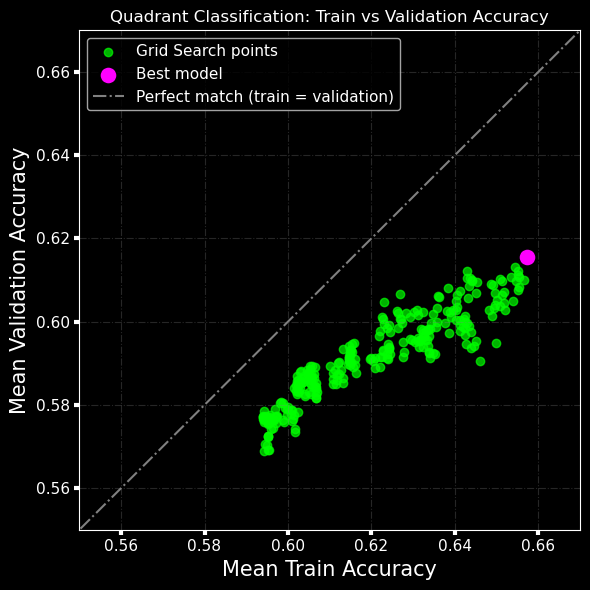

In [52]:
# === Plotting Train vs Test Accuracy for Quadrant Classification ===
#plt.figure(figsize=(8,6))

# Scatter of all grid search points
plt.scatter(
    results_class_quad['mean_train_accuracy'], 
    results_class_quad['mean_test_accuracy'], 
    alpha=0.7, 
    label='Grid Search points',
    color = '#00ff00'
)

# Best point
best_train_acc_quad = results_class_quad.loc[
    results_class_quad['rank_test_score'] == 1, 'mean_train_accuracy'
].values[0]

best_test_acc_quad = results_class_quad.loc[
    results_class_quad['rank_test_score'] == 1, 'mean_test_accuracy'
].values[0]

plt.scatter(
    best_train_acc_quad,
    best_test_acc_quad,
    s=150,
    label='Best model',
    edgecolors='black',
    color = '#ff00ff'
)

# Reference line (ideal case: train = test)
plt.plot([0, 1], [0, 1], label='Perfect match (train = validation)', color = 'grey', linestyle = '-.')

# Labels and legend
plt.xlabel('Mean Train Accuracy')
plt.ylabel('Mean Validation Accuracy')
plt.title('Quadrant Classification: Train vs Validation Accuracy')
plt.xlim(0.55, 0.67)
plt.ylim(0.55, 0.67)
plt.legend()

plt.tight_layout()
plt.savefig("assets/images/overfitting_quad_2.png", bbox_inches='tight', dpi=300)

plt.show()

In [53]:
# Get the best estimator from grid search
best_model_quad = grid_search_quad.best_estimator_

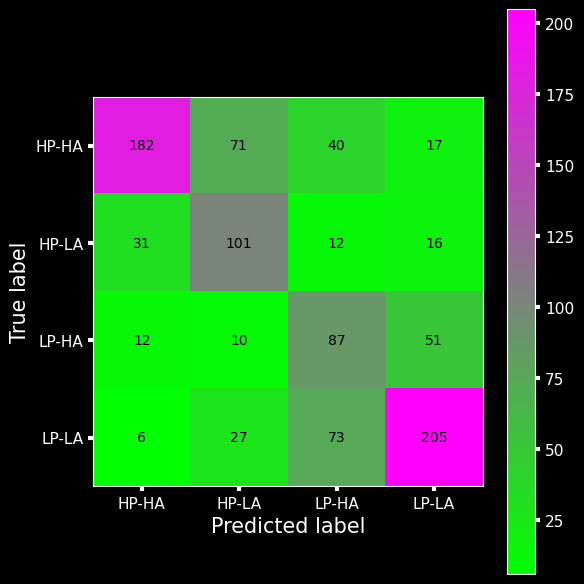

In [54]:
quad_label_map = {0: 'LP-LA',
                  1: 'HP-LA',
                  2: 'LP-HA',
                  3: 'HP-HA'}

y_quad_pred = best_model_quad.predict(X_test)
test_pred_quad_df = pd.DataFrame({'y_test':y_test, 'y_quad_pred' : y_quad_pred}).reset_index(drop=True)

conf_matrix_quad = confusion_matrix(y_test, y_quad_pred)
plt.rcParams.update({'axes.grid' : False})
disp = ConfusionMatrixDisplay.from_predictions(test_pred_quad_df['y_test'].map(quad_label_map), test_pred_quad_df['y_quad_pred'].map(quad_label_map), cmap=sns.color_palette('blend:#00ff00,#ff00ff', as_cmap=True), text_kw={'color' : 'black'})
plt.rcParams.update(our_settings)

plt.tight_layout()
plt.savefig("assets/images/confusion_matrix_quad.png", dpi=300)

In [55]:
print("\nQuadrant Classification Report:\n")
print(classification_report(y_test, y_quad_pred, digits=4))


Quadrant Classification Report:

              precision    recall  f1-score   support

           0     0.7093    0.6592    0.6833       311
           1     0.4833    0.6312    0.5474       160
           2     0.4104    0.5437    0.4677       160
           3     0.7879    0.5871    0.6728       310

    accuracy                         0.6111       941
   macro avg     0.5977    0.6053    0.5928       941
weighted avg     0.6459    0.6111    0.6201       941



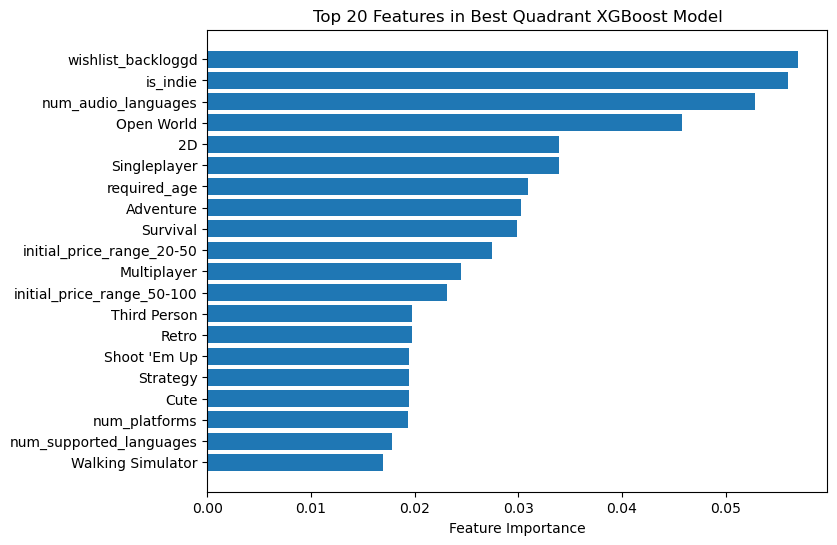

In [98]:
# Get feature importances
importances_quad = best_model_quad.feature_importances_

# Create a DataFrame
feat_imp_quad_df = pd.DataFrame({
    'feature': features,
    'importance': importances_quad
})

# Sort descending by importance
feat_imp_quad_df = feat_imp_quad_df.sort_values(by='importance', ascending=False)

# Plot top 20
plt.figure(figsize=(8, 6))
plt.barh(
    feat_imp_quad_df['feature'].head(20)[::-1], 
    feat_imp_quad_df['importance'].head(20)[::-1]
)
plt.xlabel('Feature Importance')
plt.title('Top 20 Features in Best Quadrant XGBoost Model')

# plt.tight_layout()
# plt.savefig("assets/images/feature_importance_quad.png", bbox_inches='tight', dpi=300)
# plt.close()

plt.show()


In [95]:
feat_imp_quad_df.reset_index(drop=True)[:15]

,feature,importance
0,wishlist_backloggd,0.056987
1,is_indie,0.056000
2,num_audio_languages,0.052804
3,Open World,0.045809
4,2D,0.033938
5,Singleplayer,0.033909
6,required_age,0.030956
7,Adventure,0.030234
8,Survival,0.029869
9,initial_price_range_20-50,0.027466


**What Drives a Game’s Place in the Popularity–Appreciation Spectrum?**

The results of the multiclass classification model offer a fascinating glimpse into the multifaceted forces shaping how games are received. While previous models teased apart appreciation and popularity separately, this four-class framework shows which features are most influential in positioning a game within any of the combined outcome categories.

Unsurprisingly, wishlist_backloggd reigns as the top feature. This user-curated metric—indicating pre-release interest—is a reliable predictor across all quadrants of reception, emphasizing how community anticipation often precedes both commercial success and critical acclaim.

Close behind is is_indie, underscoring the strong identity indie games carry within the ecosystem. Whether they're beloved cult hits or niche underdogs, indie status consistently plays a role in shaping reception dynamics, especially appreciation-heavy outcomes.

Next, language support takes center stage with num_audio_languages in third place, reflecting the global reach and accessibility factor. This suggests that wider localization can boost both popularity and appreciation, particularly in international markets.

Design features like Open World, 2D, and Singleplayer occupy the middle tier. Their presence shows how core gameplay structure influences how games are perceived—whether they lean toward rich, exploratory experiences or more compact, artistic ones.

Demographic and content markers like required_age and initial_price_range_20-50 offer insight into the business and audience side. Price bands, in particular, hint at different expectations in player satisfaction depending on the perceived value-for-money bracket.

Genres and styles like Adventure, Survival, Third Person, Retro, and Shoot 'Em Up round out the list. Their inclusion suggests that while genre alone doesn't determine success, certain styles nudge games toward distinct reception profiles—particularly when paired with the right mechanics or presentation.

In short, this model confirms what many in the industry intuitively grasp: a game’s reception is the product of both its identity (indie status, price, genre) and its design choices (language support, structure, scope). The best-performing titles tend to strike a thoughtful balance between them.

In [56]:
# Make a copy and convert all to numeric (will raise an error if conversion fails)
X_shap = X.copy()
X_shap = X_shap.apply(pd.to_numeric, errors='raise')

In [57]:
# Recompute SHAP values using unified interface
explainer = shap.Explainer(grid_search_quad.best_estimator_)
shap_values = explainer(X_shap)  # returns a shap.Explanation object

print("shap_values shape:", shap_values.values.shape)  # Should be (n_samples, n_classes, n_features)

shap_values shape: (4703, 148, 4)



SHAP Dot Summary Plot for Class 0: Low App-Low Pop

SHAP Dot Summary Plot for Class 1: Low App-High Pop

SHAP Dot Summary Plot for Class 2: High App-Low Pop

SHAP Dot Summary Plot for Class 3: High App-High Pop


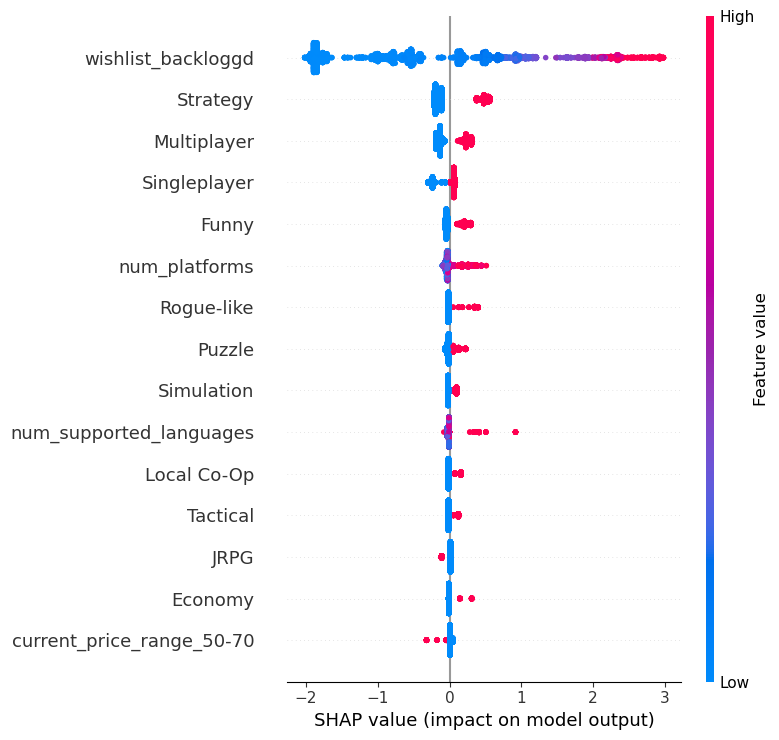

In [58]:
class_names = ['Low App-Low Pop', 'Low App-High Pop', 'High App-Low Pop', 'High App-High Pop']

plt.style.use('default')
plt.rcParams.update({'axes.grid' : False})

for i in range(len(class_names)):
    print(f"\nSHAP Dot Summary Plot for Class {i}: {class_names[i]}")
    shap.summary_plot(
        shap_values.values[:, :, i],
        X_shap,
        feature_names=X_shap.columns,
        plot_type='dot',  # this shows sign and distribution
        max_display=15,
        show = False
    )

    plt.tight_layout()
    plt.savefig(f"assets/images/shap_summary_plot_{class_names[i]}.png", dpi=300)


plt.style.use('dark_background')
plt.rcParams.update(our_settings)

In [99]:
# Initialize a dictionary to store stats for each class
conditional_shap_effects_multiclass = {}

# For each class
for c in range(shap_values.values.shape[2]):
    class_dict = {}

    print(f"\nProcessing Class {c}: {class_names[c]}")
    
    for feature in X_shap.columns:
        idx = X_shap.columns.get_loc(feature)
        shap_vals_c = shap_values.values[:, idx, c]
        vals = X_shap[feature].values

        stats = {
            'mean_SHAP': shap_vals_c.mean(),
            'mean_abs_SHAP': np.abs(shap_vals_c).mean(),
            'std_SHAP': shap_vals_c.std()
        }

        # Conditional effects for binary features
        if set(np.unique(vals)).issubset({0, 1}):
            stats['mean_SHAP_when_1'] = shap_vals_c[vals == 1].mean()
            stats['mean_SHAP_when_0'] = shap_vals_c[vals == 0].mean()

        class_dict[feature] = stats

    # Sort by mean_abs_SHAP for this class
    sorted_class_dict = dict(
        sorted(class_dict.items(), key=lambda item: item[1]['mean_abs_SHAP'], reverse=True)
    )
    
    conditional_shap_effects_multiclass[f'Class_{c}_{class_names[c]}'] = sorted_class_dict


Processing Class 0: Low App / Low Pop

Processing Class 1: Low App / High Pop

Processing Class 2: High App / Low Pop

Processing Class 3: High App / High Pop


In [101]:
conditional_shap_effects_multiclass.keys()

dict_keys(['Class_0_Low App / Low Pop', 'Class_1_Low App / High Pop', 'Class_2_High App / Low Pop', 'Class_3_High App / High Pop'])

In [104]:
conditional_shap_effects_multiclass['Class_0_Low App / Low Pop']

{'wishlist_backloggd': {'mean_SHAP': -0.39635435,
  'mean_abs_SHAP': 1.0342661,
  'std_SHAP': 1.1747177},
 'Multiplayer': {'mean_SHAP': -0.023848047,
  'mean_abs_SHAP': 0.22800598,
  'std_SHAP': 0.2607689,
  'mean_SHAP_when_1': -0.3980072,
  'mean_SHAP_when_0': 0.14932422},
 'Singleplayer': {'mean_SHAP': 0.0025922765,
  'mean_abs_SHAP': 0.117575705,
  'std_SHAP': 0.14134412,
  'mean_SHAP_when_1': -0.077451594,
  'mean_SHAP_when_0': 0.2331477},
 'Strategy': {'mean_SHAP': 0.009443155,
  'mean_abs_SHAP': 0.10550523,
  'std_SHAP': 0.120915845,
  'mean_SHAP_when_1': -0.2066697,
  'mean_SHAP_when_0': 0.07487567},
 'num_platforms': {'mean_SHAP': -0.0023683403,
  'mean_abs_SHAP': 0.09026052,
  'std_SHAP': 0.1067453},
 'Open World': {'mean_SHAP': -0.0083778035,
  'mean_abs_SHAP': 0.05343748,
  'std_SHAP': 0.0785498,
  'mean_SHAP_when_1': -0.16765437,
  'mean_SHAP_when_0': 0.027062986},
 'Adventure': {'mean_SHAP': 0.010904714,
  'mean_abs_SHAP': 0.039863914,
  'std_SHAP': 0.045571797,
  'mean_SH

**Low Popularity / Low Appreciation: A Cold Reception on All Fronts**

In the least desirable quadrant—where games struggle both in player reach and critical reception—the features with the strongest predictive pull tell a sobering story. The standout indicator is wishlist_backloggd. The majority of SHAP points are blue, indicating that most games in this class have low wishlist counts, which pushes the model toward this category. However, a few red points appear far to the left of the plot, showing that games with somewhat higher wishlist counts can slightly pull the prediction away from this class. This aligns with intuition: lack of early interest often correlates with later neglect.

Multiplayer support also shows a striking negative SHAP value when present (–0.40), meaning that having this feature actually reduces a game’s likelihood of falling into the low/low quadrant. In other words, multiplayer elements seem to insulate games from total obscurity—perhaps because they encourage ongoing engagement or social play, even if appreciation isn’t high.

Singleplayer, conversely, shows a modestly negative impact when present (–0.08), which also implies a protective effect. Games lacking singleplayer modes are more likely to fall into this bottom tier—possibly because they fail to connect with a broader solo-playing audience.

Several genre tags follow this same pattern of protective association:

- Strategy (–0.21 when present),

- Open World (–0.17),

- Sandbox (–0.16),

- and Co-op (–0.08)

— all of which lower the likelihood of being classified as low/low. These tags may be signs of games that appeal to specialized audiences or offer expansive systems that earn appreciation even if the games aren’t breakout hits.

Tags like Funny, Pixel Graphics, and Walking Simulator also display interesting dynamics. For example, Walking Simulator, when present, has a positive SHAP value (+0.43), which increases the chance of being placed in the low/low quadrant. This may reflect a risk: when games lean too hard into experimental or minimalist design, they can polarize or alienate broader audiences if not executed with excellence.

Meanwhile, Puzzle, Funny, and Colorful all have relatively low absolute SHAP contributions, but still reveal subtle trends: when present, these tags slightly lower the model’s belief that the game belongs in this weak-performing category. Their absence, however, nudges the game closer to obscurity—implying they may act as low-key assets in game perception.

Overall, the low/low quadrant seems populated by games that fail to strongly activate any distinct audience, with a lack of wishlist activity acting as the most consistent red flag. Yet even subtle inclusions—like multiplayer features or strategic complexity—can help tilt a title away from this unloved corner of the market.

In [105]:
conditional_shap_effects_multiclass['Class_1_Low App / High Pop']

{'wishlist_backloggd': {'mean_SHAP': -0.12554213,
  'mean_abs_SHAP': 0.46025413,
  'std_SHAP': 0.60659236},
 'num_supported_languages': {'mean_SHAP': -0.035497602,
  'mean_abs_SHAP': 0.2194113,
  'std_SHAP': 0.25205654},
 'num_audio_languages': {'mean_SHAP': -0.017027559,
  'mean_abs_SHAP': 0.21885611,
  'std_SHAP': 0.2277536},
 'Multiplayer': {'mean_SHAP': -0.022883829,
  'mean_abs_SHAP': 0.18826576,
  'std_SHAP': 0.19550067,
  'mean_SHAP_when_1': 0.26135454,
  'mean_SHAP_when_0': -0.15443802},
 'is_indie': {'mean_SHAP': -0.01653072,
  'mean_abs_SHAP': 0.13977453,
  'std_SHAP': 0.14336306,
  'mean_SHAP_when_1': -0.14862587,
  'mean_SHAP_when_0': 0.12995866},
 'required_age': {'mean_SHAP': -0.015893819,
  'mean_abs_SHAP': 0.1102684,
  'std_SHAP': 0.15637533},
 '2D': {'mean_SHAP': -0.011676526,
  'mean_abs_SHAP': 0.091898255,
  'std_SHAP': 0.11892371,
  'mean_SHAP_when_1': -0.21087109,
  'mean_SHAP_when_0': 0.053168382},
 'Third Person': {'mean_SHAP': -0.014501229,
  'mean_abs_SHAP': 0.

**High Popularity / Low Appreciation: The Hype That Didn’t Land**

In the quadrant representing commercial success but lukewarm reception, we find the paradox of games that managed to attract attention—often en masse—but struggled to convert that attention into critical or user acclaim.

The most influential signal here remains wishlist_backloggd. Again, the majority of points are blue, meaning lower wishlist values are typical for games in this class, contributing negatively to the prediction. Only a very small number of red points appear on the right, indicating that very high wishlist counts are uncommon and may increase the chance of being classified here, but their effect is limited.

Both num_supported_languages and num_audio_languages show an overall negative SHAP impact, suggesting that lower localization breadth is typically associated with a higher chance of being classified as popular but poorly appreciated. However, the effect isn’t linear. As seen in the SHAP summary plots, games with very high language support—represented by red dots on the right—begin to reverse that trend, signaling that extensively localized titles may escape this quadrant, likely due to more thoughtful execution or global appeal.

The Multiplayer tag is particularly intriguing. It has a positive SHAP value when present (+0.26), meaning that games with multiplayer features are more likely to be classified as popular but less appreciated. This might reflect titles that gain attention through social play or hype cycles, but underdeliver on gameplay or depth once the initial engagement fades.

A similar pattern shows up with Open World, Third Person, RPG, and Simulation: all have positive SHAP values when present, even if their overall (mean) contribution trends slightly negative due to class imbalance. In each case, these features increase the model’s confidence in this quadrant when they appear, hinting at a profile of large-scale, perhaps ambitious games that manage to draw attention but fall short of critical expectations.

On the other hand, some features help “pull” a game away from this quadrant:

- 2D games, when present, lower the likelihood of falling into the high-popularity/low-appreciation group (–0.21). These games may appeal to more niche or indie audiences, where expectations are better aligned with outcomes.

- is_indie also shows a negative SHAP when present (–0.15), again pointing to the idea that indie games, even when popular, are more often well-received—perhaps due to tighter vision or better-aligned player expectations.

Even price may play a subtle role: games in the 50–100 range see a large positive SHAP effect when priced in that tier (+0.50), implying that expensive games might get more attention but also face harsher scrutiny, contributing to a mismatch between visibility and appreciation.

This quadrant, more than any other, illustrates the disconnect that can arise between marketing momentum and lasting value. Big features, broad reach, and ambitious scope might win attention, but it takes more than that to sustain goodwill.

In [106]:
conditional_shap_effects_multiclass['Class_2_High App / Low Pop']

{'wishlist_backloggd': {'mean_SHAP': -0.07955501,
  'mean_abs_SHAP': 0.3499131,
  'std_SHAP': 0.43377078},
 'num_supported_languages': {'mean_SHAP': -0.017130656,
  'mean_abs_SHAP': 0.14974248,
  'std_SHAP': 0.17723484},
 'Open World': {'mean_SHAP': -0.020042,
  'mean_abs_SHAP': 0.11224031,
  'std_SHAP': 0.16526565,
  'mean_SHAP_when_1': -0.36339,
  'mean_SHAP_when_0': 0.056356717},
 'num_platforms': {'mean_SHAP': -0.013371765,
  'mean_abs_SHAP': 0.10341222,
  'std_SHAP': 0.10843642},
 'is_indie': {'mean_SHAP': -0.0021586847,
  'mean_abs_SHAP': 0.082139045,
  'std_SHAP': 0.089631915,
  'mean_SHAP_when_1': 0.074444175,
  'mean_SHAP_when_0': -0.087108865},
 'num_audio_languages': {'mean_SHAP': -0.003262641,
  'mean_abs_SHAP': 0.081891306,
  'std_SHAP': 0.08605255},
 'required_age': {'mean_SHAP': -0.023273243,
  'mean_abs_SHAP': 0.08088993,
  'std_SHAP': 0.14495337},
 '2D': {'mean_SHAP': -0.0028821938,
  'mean_abs_SHAP': 0.07288959,
  'std_SHAP': 0.086887136,
  'mean_SHAP_when_1': 0.14253

**Understanding Low Popularity but High Appreciation Games: Key Feature Insights**

In our analysis of games that receive high appreciation despite low popularity, several interesting patterns emerge from the SHAP values.

A key factor is the wishlist_backloggd feature. Most points are blue, reinforcing the idea that games with fewer wishlists are more likely here. A few red points appear far to the left, suggesting some games with low wishlist counts actually have a positive effect on the prediction for this class, which may reflect niche titles with strong appreciation despite low popularity.

Localization features show some complexity: num_supported_languages generally has a small negative mean SHAP value, and the majority of lower values (blue points) appear on the right side of the SHAP summary plot, indicating that games with fewer supported languages often belong here. Meanwhile, num_audio_languages displays a more mixed pattern, with a spread of both low and high values (blue points) on both ends of the SHAP spectrum, suggesting a less clear-cut relationship with this category.

Genre-wise, the Open World tag has a negative SHAP value when present, meaning open-world games are less likely to be low-popularity/high-appreciation — these tend to be more mainstream hits. Similarly, Survival and Online Co-Op modes follow this trend, suggesting these popular features correlate with larger player bases.

Conversely, features such as 2D, Puzzle, and Cute have positive SHAP values when present, indicating these styles are more typical of niche games that receive high praise but limited popularity.

The is_indie flag also contributes positively, reinforcing that indie titles are more represented in this category.

Multiplayer modes tend to have a slight negative impact here, aligning with the idea that many highly appreciated but less popular games focus on singleplayer or specialized experiences.

Finally, initial_price_range_20-50 has a negative SHAP when present, suggesting mid-priced games are somewhat less common in this category, possibly due to pricing strategies favoring accessibility or niche positioning.

Overall, these insights paint a nuanced picture of critically appreciated games that fly under the mainstream radar, often characterized by indie development, focused gameplay styles, and distinctive aesthetics.

In [107]:
conditional_shap_effects_multiclass['Class_3_High App / High Pop']

{'wishlist_backloggd': {'mean_SHAP': -0.2639869,
  'mean_abs_SHAP': 1.1469887,
  'std_SHAP': 1.3269101},
 'Strategy': {'mean_SHAP': -0.015920945,
  'mean_abs_SHAP': 0.24379142,
  'std_SHAP': 0.28193608,
  'mean_SHAP_when_1': 0.49024466,
  'mean_SHAP_when_0': -0.16917275},
 'Multiplayer': {'mean_SHAP': -0.020386245,
  'mean_abs_SHAP': 0.17213881,
  'std_SHAP': 0.18071216,
  'mean_SHAP_when_1': 0.23981597,
  'mean_SHAP_when_0': -0.14081578},
 'Singleplayer': {'mean_SHAP': -0.014696027,
  'mean_abs_SHAP': 0.105683595,
  'std_SHAP': 0.13138343,
  'mean_SHAP_when_1': 0.06128824,
  'mean_SHAP_when_0': -0.23355828},
 'Funny': {'mean_SHAP': -0.0006791789,
  'mean_abs_SHAP': 0.070606634,
  'std_SHAP': 0.09682952,
  'mean_SHAP_when_1': 0.20920405,
  'mean_SHAP_when_0': -0.04279514},
 'num_platforms': {'mean_SHAP': -0.005473344,
  'mean_abs_SHAP': 0.06195097,
  'std_SHAP': 0.096937835},
 'Rogue-like': {'mean_SHAP': 0.0011228615,
  'mean_abs_SHAP': 0.033765476,
  'std_SHAP': 0.08050391,
  'mean_SH

**What Drives High Popularity and High Appreciation in Games? Key SHAP Feature Insights**

Analyzing the features behind games that achieve both high popularity and strong appreciation reveals important patterns with some nuanced interpretations.

The wishlist_backloggd feature shows that most data points are blue (indicating lower feature values) across the range, yet as the feature value moves far to the right, the points become red, showing a positive SHAP impact. This suggests that while many games in this class have relatively low wishlist counts, those with exceptionally high wishlist numbers strongly push the model toward this class.

Regarding num_platforms, the SHAP values reflect a mixed effect but with a clear trend: blue points cluster on the left (lower number of platforms), and red points on the right (higher number of platforms), implying that games available on more platforms tend to positively influence the classification as highly popular and appreciated. This reinforces the idea that wider platform availability supports both broader popularity and appreciation.

Key genres remain influential: Strategy and Multiplayer tags carry strong positive effects when present, highlighting their importance in this class. Singleplayer also shows a modest positive contribution. Features like Funny, Rogue-like, Puzzle, and Simulation have smaller positive impacts when present, indicating that engaging and diverse gameplay styles add value.

Some niche tags like JRPG show subtle, nuanced effects, hinting at a more complex relationship with popularity and appreciation.

Economic mechanics (Economy) positively contribute when present, suggesting these gameplay elements resonate with this class's players.

Pricing factors such as being in the current_price_range_50-70 show mixed effects, indicating that pricing strategy may have subtle influence but is not a major driver.

In summary, highly popular and well-appreciated games tend to be available on multiple platforms and, in some cases, enjoy high wishlist numbers. They often belong to favored genres like strategy and multiplayer, with additional gameplay depth and style helping secure their dual success.

In [98]:
shap.initjs()

i = 0  # sample index
c = 1  # class index

values = shap_values.values[i, :, c]  # feature shap values
data = X_shap.iloc[i]                 # feature values

# base value for this instance/class
if len(shap_values.base_values.shape) == 1:
    base_value = shap_values.base_values[c]
else:
    base_value = shap_values.base_values[i, c]

expl = shap.Explanation(
    values=values,
    base_values=base_value,
    data=data,
    feature_names=X_shap.columns
)

print(f"Instance index: {i}")
print(f"Ground truth class: {y_quadrant[i]}")
print(f"Predicted class: {grid_search_quad.best_estimator_.predict(X_shap)[i]}")
print(f"Displaying SHAP force plot for class {class_names[c]} (class index {c})")

shap.plots.force(expl)


Instance index: 0
Ground truth class: 0
Predicted class: 0
Displaying SHAP force plot for class Low App / High Pop (class index 1)


# Predictive Modeling: How We Scored Popularity and Appreciation

## Overview

To understand what makes a game successful, we trained a set of machine learning models to predict **popularity**, **player appreciation**, and their combined expression as a **quadrant** (e.g. high-popularity/low-appreciation). The goal was not only to classify games into outcome categories, but also to uncover which features influence those outcomes most — using interpretable techniques like SHAP to peer inside the "black box" of the model.

## Problem Setup

We framed the task as a **classification problem** across three fronts:

- **Popularity Score**: Binary classification — _high_ vs _low_ based on the median score in the dataset.  
- **Appreciation Score**: Binary classification — _high_ vs _low_ (also median split).  
- **Quadrant Prediction**: Multiclass classification into four groups:
  - High Popularity / High Appreciation  
  - High Popularity / Low Appreciation  
  - Low Popularity / High Appreciation  
  - Low Popularity / Low Appreciation  

These categories help us understand how well a game resonates commercially and critically.

---

## Data and Feature Engineering

Our modeling dataset was built from the **Steam Kaggle dataset**, enhanced with external sources including **SteamSpy**, **SteamCharts**, **Backloggd**, and **Metacritic**. After filtering for games with a valid Metacritic page, we worked with a refined dataset of around **5,000 games**.

We used a combination of **numeric**, **categorical**, and **one-hot encoded tag features**:

- **Numerical**:  
  `required_age`, `dlc_count`, `year`, `is_indie`, `wishlist_backloggd`,  
  `num_supported_languages`, `num_audio_languages`, `num_platforms`

- **Categorical** (one-hot encoded):  
  Tags/attributes across 9 game design categories:  
  `Themes & Moods`, `Top-Level Genres`, `Visuals & Viewpoint`, `Sub-Genres`,  
  `Players`, `Story`, `Level Design`, `Sports`, and `initial/current_price_range`

---

## Modeling Approach

We used the **XGBoost classifier**, a high-performance gradient boosting algorithm well-suited for tabular data. Each model was tuned using a **grid search** over key hyperparameters to balance learning ability and generalization. Key tuning strategies included:

- Keeping `max_depth` and `n_estimators` low (1–2 and 15–25 respectively)  
- Monitoring **early stopping** to prevent overfitting  
- Using `logloss` and `mlogloss` as evaluation metrics

---

## Model Performance

### Popularity Model

- **Best Accuracy (CV)**: 0.865  
- **Train Accuracy**: 0.879  
- **Best Params**:  
  `{max_depth: 2, n_estimators: 25, learning_rate: 0.5, colsample_bytree: 0.8, subsample: 0.8, reg_alpha: 0.5, reg_lambda: 0.8}`

Strong performance with minimal overfitting.

---

### Appreciation Model

- **Best Accuracy (CV)**: 0.725  
- **Train Accuracy**: 0.746  
- **Best Params**:  
  `{max_depth: 2, n_estimators: 20, learning_rate: 0.5, colsample_bytree: 0.8, subsample: 0.5, reg_alpha: 0.5, reg_lambda: 1}`

Predictive accuracy is solid, especially given that appreciation is inherently more subjective.

---

### Quadrant Classifier

- **Best Accuracy (CV)**: 0.616  
- **Train Accuracy**: 0.657  
- **Best Params**:  
  `{max_depth: 2, n_estimators: 20, learning_rate: 0.5, colsample_bytree: 0.8, subsample: 0.8, reg_alpha: 0, reg_lambda: 0.5}`

Multi-class prediction is understandably more difficult, but the model performs well enough to support deeper SHAP-based analysis of what drives game outcomes.

---

## Explainability: Using SHAP

To move beyond raw accuracy and into **insight**, we used **SHAP (SHapley Additive exPlanations)** to interpret the models. SHAP provides per-feature attribution scores that show not only what features matter, but **how** they influence predictions — whether positively or negatively.

The SHAP summary plot shows the impact of each feature on the model's predictions across all samples. Each dot represents a game, positioned horizontally by how much that feature pushed the prediction higher or lower (the SHAP value). The color of the dot indicates the actual value of the feature for that game — with red meaning a high value and blue a low one. Features are sorted top to bottom by their overall importance (mean absolute SHAP value), so those at the top had the greatest influence on the model’s output. This plot helps you see not just which features matter most, but also how different values of those features affect predictions.

SHAP helped reveal:

- The dominant influence of `wishlist_backloggd` across all models  
- The asymmetric importance of features like `Multiplayer`, `Strategy`, `is_indie`, and `Open World`  
- That high appreciation often hinges on tags like `Puzzle`, `Cute`, or `Funny`, while popularity leans on broader features like multiplayer or platform support  
- The complexity of quadrant dynamics — e.g., how some features protect against a "low/low" outcome, while others increase the risk of being overhyped but underwhelming

---

## Limitations and Future Work

- **Data size** (~5,000 games) is relatively modest, especially for deep modeling of subjective traits like appreciation.  
- **Tag quality** depends on how consistently games are labeled, which may introduce noise.  
- **Temporal generalization** is not tested — models were trained on a snapshot and may not fully predict future hits.  
- **Additional features** related to marketing or reviews content could add deeper context to future models.

---

## Final Thoughts

These models aren’t crystal balls — but they offer a structured, data-driven look at what makes a game click. With accuracy above 85% for popularity and compelling SHAP insights for all outcomes, the models help us surface the **signals behind success** — and maybe even spot the next sleeper hit.
